# Formative Assessment
#### Michael NANA KAMENI

### The goal

The goal of the assignment is to predict active power of a wind turbine using several input features. The data comes from a wind farm in France, [La Haute Borne Data (2013-2016)](https://opendata-renewables.engie.com/explore/dataset/la-haute-borne-data-2013-2016/table/?dataChart=eyJxdWVyaWVzIjpbeyJjb25maWciOnsiZGF0YXNldCI6ImxhLWhhdXRlLWJvcm5lLWRhdGEtMjAxMy0yMDE2Iiwib3B0aW9ucyI6e319LCJjaGFydHMiOlt7InR5cGUiOiJsaW5lIiwiZnVuYyI6IkFWRyIsInlBeGlzIjoiYmFfYXZnIiwic2NpZW50aWZpY0Rpc3BsYXkiOnRydWUsImNvbG9yIjoiIzY2YzJhNSJ9XSwieEF4aXMiOiJkYXRlX3RpbWUiLCJtYXhwb2ludHMiOiIiLCJ0aW1lc2NhbGUiOiJ5ZWFyIiwic29ydCI6IiJ9XX0%3D). A total of 139 features are included in the dataset, with several measures of the same feature. For instance, the active power feature is split into the following measurements: `P_min, P_max, P_avg, P_std`. 

The overall tasks are the following:

1. Use a random forest regressor to predict power output. 
2. Perform dimension reduction using PCA.
2. Perform cross validation to determine how well the model generalises. 
3. Determine the importance of the features.
4. Determine the performance of the models as well.

The notebook will guide you as to how to go about fulfilling these overall tasks by doing other smaller subtasks.

Note that the dataset is very large, with 139 columns, so using a bit of domain knowledge we identified the following features that could be using in predicting wind turbine power output. Add to the feature subset as you build the model.



### Load the data

Import the necessary libraries and load the data. Once loaded, investigate the data. There are two files: `data_description.csv` lists the variables or features of the dataset. The file `wind-data.csv` contains the data (`wind-data-truncated.csv` if downloaded from the LMS, due to file size limits).

In [1]:
# Let us import useful libraries
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score

# Display graphics in Jupyter Notebook
%matplotlib inline

Load both the `data_description.csv` and `wind-data.csv` files.

In [2]:
df_desc = pd.read_csv('data_description.csv', sep =';')
df_desc

Variable_name                 Variable_long_name Unit_long_name  \
0            Va2                    Vane_position_2            deg   
1            Ws2                       Wind_speed_2            m/s   
2             Ws                         Wind_speed            m/s   
3           Wa_c  Absolute_wind_direction_corrected            deg   
4           Na_c            Nacelle_angle_corrected            deg   
5             Ot                Outdoor_temperature          deg_C   
6             Yt                Nacelle_temperature          deg_C   
7             Nf                     Grid_frequency             Hz   
8             Nu                       Grid_voltage              V   
9             Rm                             Torque             Nm   
10           Dst       Generator_stator_temperature          deg_C   
11           Git          Gearbox_inlet_temperature          deg_C   
12             Q                     Reactive_power           kVAr   
13          Gb2t      Gearbox_bearing_2_temperature          deg_C   
14          Gost       Gearbox_oil_sump_temperature          deg_C   
15           DCs          Generator_converter_speed            rpm   
16            Wa            Absolute_wind_direction            deg   
17            Ds                    Generator_speed            rpm   
18            Cm                   Converter_torque             Nm   
19            Va                      Vane_position            deg   
20            Ya                      Nacelle_angle            deg   
21            Rs                        Rotor_speed            rpm   
22             S                     Apparent_power            kVA   
23        Cosphi                       Power_factor            NaN   
24            Rt                    Hub_temperature          deg_C   
25            Ba                        Pitch_angle            deg   
26             P                       Active_power             kW   
27           Va1                    Vane_position_1            deg   
28           Ws1                       Wind_speed_1            m/s   
29          Db2t    Generator_bearing_2_temperature          deg_C   
30          Db1t    Generator_bearing_1_temperature          deg_C   
31          Gb1t      Gearbox_bearing_1_temperature          deg_C   
32           Rbt          Rotor_bearing_temperature          deg_C   
33           Pas               Pitch_angle_setpoint            NaN   

                                              Comment  
0                     Second wind vane on the nacelle  
1                    Second anemometer on the nacelle  
2                                  Average wind speed  
3                                                 NaN  
4                                                 NaN  
5                                                 NaN  
6                                                 NaN  
7                                                 NaN  
8                                                 NaN  
9                                                 NaN  
10                                                NaN  
11                                                NaN  
12                                                NaN  
13                                                NaN  
14                                                NaN  
15                                                NaN  
16                                                NaN  
17                                                NaN  
18                                                NaN  
19                                                NaN  
20                                                NaN  
21                                                NaN  
22  Should be the square root of the sum of P squa...  
23                                   Should equal P/S  
24                                                NaN  
25                                                NaN  
26                                      

__Helpful hint__: Load the data into a dataframe. Use the `parse_dates=['Date_time']` argument in the `read_csv` function in order to display dates in later plots.

In [3]:
df = pd.read_csv('wind-data.csv', sep =';', parse_dates = ["Date_time"]) 
df.head()

Wind_turbine_name                  Date_time     Ba_avg     Ba_min  \
0            R80711  2013-01-07 01:20:00+01:00  41.160000  -1.000000   
1            R80711  2013-01-05 22:20:00+01:00  -1.000000  -1.000000   
2            R80711  2013-01-06 08:30:00+01:00  -1.000000  -1.000000   
3            R80711  2013-01-05 21:10:00+01:00  44.990002  44.990002   
4            R80711  2013-01-06 11:20:00+01:00  -0.760000  -1.000000   

      Ba_max  Ba_std  Rt_avg  Rt_min  Rt_max  Rt_std  ...  Pas_max  Pas_std  \
0  44.990002   11.27   12.65    12.0    13.0    0.41  ...      NaN      NaN   
1  -0.870000    0.01   12.95    12.0    13.0    0.16  ...      NaN      NaN   
2  -1.000000    0.00   13.74    13.0    14.0    0.35  ...      NaN      NaN   
3  44.990002    0.00   12.14    12.0    13.0    0.27  ...      NaN      NaN   
4   0.000000    0.40   13.78    13.0    14.0    0.35  ...      NaN      NaN   

    Wa_c_avg  Wa_c_min  Wa_c_max  Wa_c_std   Na_c_avg  Na_c_min  Na_c_max  \
0   37.77000       NaN       NaN       NaN   33.75000       NaN       NaN   
1  313.35001       NaN       NaN       NaN  279.92999       NaN       NaN   
2  241.59000       NaN       NaN       NaN  246.67999       NaN       NaN   
3  280.75000       NaN       NaN       NaN  274.12000       NaN       NaN   
4  293.01001       NaN       NaN       NaN  293.87000       NaN       NaN   

   Na_c_std  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  

[5 rows x 138 columns]

In [4]:
df.tail() # print out the last five rows

Wind_turbine_name                  Date_time  Ba_avg  Ba_min  Ba_max  \
840375            R80721  2016-02-21 01:10:00+01:00    0.10   -1.00   10.11   
840376            R80790  2014-01-04 01:20:00+01:00   -0.97   -0.99   -0.96   
840377            R80790  2014-01-03 08:30:00+01:00   -0.20   -1.03    6.89   
840378            R80721  2016-03-20 00:50:00+01:00   -1.00   -1.00   -1.00   
840379            R80790  2014-01-03 12:50:00+01:00   -0.97   -1.03    0.89   

        Ba_std  Rt_avg     Rt_min  Rt_max  Rt_std  ...  Pas_max  Pas_std  \
840375    2.27    19.0  18.700001    19.0    0.01  ...      NaN      NaN   
840376    0.00    17.6  17.000000    18.0    0.42  ...      NaN      NaN   
840377    1.38    18.0  18.000000    18.0    0.00  ...      NaN      NaN   
840378    0.00    15.0  15.000000    15.0    0.00  ...      NaN      NaN   
840379    0.13    18.0  18.000000    18.0    0.00  ...      NaN      NaN   

         Wa_c_avg  Wa_c_min  Wa_c_max  Wa_c_std   Na_c_avg  Na_c_min  \
840375  214.03000       NaN       NaN       NaN  214.03000       NaN   
840376  194.64999       NaN       NaN       NaN  200.92999       NaN   
840377  189.13000       NaN       NaN       NaN  194.35001       NaN   
840378   47.27000       NaN       NaN       NaN   47.27000       NaN   
840379  180.17000       NaN       NaN       NaN  179.95000       NaN   

        Na_c_max  Na_c_std  
840375       NaN       NaN  
840376       NaN       NaN  
840377       NaN       NaN  
840378       NaN       NaN  
840379       NaN       NaN  

[5 rows x 138 columns]

In [5]:
df.shape # print out the size of the dataframe.

(840380, 138)

## Exploring Data

Once you've loaded the data into a pandas dataframe, explore the data. You may start by generating summary statistics, identifying any missing values, and filling in missing values. Generate visualizations of the features as a way to start understanding the distribution of the data.

In [6]:
# Let us have a look at the summary statistics
df.describe()

Ba_avg         Ba_min         Ba_max         Ba_std  \
count  835702.000000  835702.000000  835702.000000  835702.000000   
mean       13.881822      12.818985      15.311493       0.841036   
std        28.328039      28.190208      28.865261       3.843590   
min      -121.260000    -131.020000    -121.260000       0.000000   
25%        -0.990000      -1.000000      -0.990000       0.000000   
50%        -0.970000      -0.990000      -0.500000       0.000000   
75%         6.150000      -0.500000      31.095000       0.130000   
max       262.609990     262.609990     262.609990      90.230003   

              Rt_avg         Rt_min         Rt_max         Rt_std  \
count  835702.000000  835702.000000  835702.000000  835702.000000   
mean       19.326442      19.130147      19.549111       0.106878   
std         6.174229       6.184367       6.177361       0.157696   
min         0.000000       0.000000       0.000000       0.000000   
25%        14.060000      14.000000      15.000000       0.000000   
50%        19.000000      19.000000      19.000000       0.000000   
75%        24.000000      24.000000      24.000000       0.210000   
max        39.000000      39.000000      39.180000       4.810000   

             DCs_avg        DCs_min  ...  Pas_max  Pas_std       Wa_c_avg  \
count  835702.000000  835702.000000  ...      0.0      0.0  806240.000000   
mean     1054.463540     942.379304  ...      NaN      NaN     177.514482   
std       625.201027     591.220101  ...      NaN      NaN      95.730534   
min      -574.900020    -575.020020  ...      NaN      NaN       0.000000   
25%       964.010010     290.515008  ...      NaN      NaN      85.239998   
50%      1177.530000    1030.010000  ...      NaN      NaN     195.200000   
75%      1562.450000    1365.030000  ...      NaN      NaN     247.880000   
max      1806.850000    1802.610000  ...      NaN      NaN     360.000000   

       Wa_c_min  Wa_c_max  Wa_c_std       Na_c_avg  Na_c_min  Na_c_max  \
count       0.0       0.0       0.0  806240.000000       0.0       0.0   
mean        NaN       NaN       NaN     178.414719       NaN       NaN   
std         NaN       NaN       NaN      96.019437       NaN       NaN   
min         NaN       NaN       NaN       0.000000       NaN       NaN   
25%         NaN       NaN       NaN      86.059998       NaN       NaN   
50%         NaN       NaN       NaN     196.710010       NaN       NaN   
75%         NaN       NaN       NaN     249.350010       NaN       NaN   
max         NaN       NaN       NaN     360.000000       NaN       NaN   

       Na_c_std  
count       0.0  
mean        NaN  
std         NaN  
min         NaN  
25%         NaN  
50%         NaN  
75%         NaN  
max         NaN  

[8 rows x 136 columns]

We can easily remark that there many columns where all values are missing. Let us deal with them. Before we continue, we are going to identify columns where all values are null and drop them.

In [7]:
# Let us identify any missing values, and fill in missing values
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing

Total     Percent
Na_c_std           840380  100.000000
Pas_avg            840380  100.000000
Va1_min            840380  100.000000
Va1_max            840380  100.000000
Va1_std            840380  100.000000
...                   ...         ...
Ws_std               4678    0.556653
Wa_avg               4678    0.556653
Wa_min               4678    0.556653
Date_time               0    0.000000
Wind_turbine_name       0    0.000000

[138 rows x 2 columns]

Features where all values are missing values:
    - Na_c_avg data desc says na means "no Nacelle angle corrected average"
    - Na_c_min data desc says na means "no Nacelle angle corrected minimum"
    - Na_c_max data desc says na means "no Nacelle angle corrected maximum"
    - Na_c_std data desc says na means "no Nacelle angle corrected standard deviation"
    - Pas_avg data desc says na means "no Pitch angle setpoint average"
    - Pas_min data desc says na means "no Pitch angle setpoint minimum"
    - Pas_max data desc says na means "no Pitch angle setpoint maximum"
    - Pas_std data desc says na means "no Pitch angle setpoint standard deviation"
    - Va1_min data desc says na means "no Vane position 1 minimum"
    - Va1_max data desc says na means "no Vane position 1 maximum"
    - Va1_std data desc says na means "no Vane position 1 standard deviation"
    - Va1_avg data desc says na means "no Vane position 1 average"
    - Va2_min data desc says na means "no Vane position 2 minimum" 
    - Va2_max data desc says na means "no Vane position 2 maximum"
    - Va2_std data desc says na means "no Vane position 2 standard deviation"
    - Va2_avg data desc says na means "no Vane position 2 average"

In [8]:
# Let us get rid of all the columns where all values are null:
df.drop(df.loc[:,df.isnull().sum()==840380], axis=1, inplace=True)

In [9]:
# Checking Categorical Data
df.select_dtypes(include=['object']).columns.values

array(['Wind_turbine_name', 'Date_time'], dtype=object)

In [10]:
# Checking Numerical Data
df.select_dtypes(include=['int64','float64']).columns.values

array(['Ba_avg', 'Ba_min', 'Ba_max', 'Ba_std', 'Rt_avg', 'Rt_min',
       'Rt_max', 'Rt_std', 'DCs_avg', 'DCs_min', 'DCs_max', 'DCs_std',
       'Cm_avg', 'Cm_min', 'Cm_max', 'Cm_std', 'P_avg', 'P_min', 'P_max',
       'P_std', 'Q_avg', 'Q_min', 'Q_max', 'Q_std', 'S_avg', 'S_min',
       'S_max', 'S_std', 'Cosphi_avg', 'Cosphi_min', 'Cosphi_max',
       'Cosphi_std', 'Ds_avg', 'Ds_min', 'Ds_max', 'Ds_std', 'Db1t_avg',
       'Db1t_min', 'Db1t_max', 'Db1t_std', 'Db2t_avg', 'Db2t_min',
       'Db2t_max', 'Db2t_std', 'Dst_avg', 'Dst_min', 'Dst_max', 'Dst_std',
       'Gb1t_avg', 'Gb1t_min', 'Gb1t_max', 'Gb1t_std', 'Gb2t_avg',
       'Gb2t_min', 'Gb2t_max', 'Gb2t_std', 'Git_avg', 'Git_min',
       'Git_max', 'Git_std', 'Gost_avg', 'Gost_min', 'Gost_max',
       'Gost_std', 'Ya_avg', 'Ya_min', 'Ya_max', 'Ya_std', 'Yt_avg',
       'Yt_min', 'Yt_max', 'Yt_std', 'Ws1_avg', 'Ws1_min', 'Ws1_max',
       'Ws1_std', 'Ws2_avg', 'Ws2_min', 'Ws2_max', 'Ws2_std', 'Ws_avg',
       'Ws_min', 'Ws_max', '

In [11]:
# Let us identify any missing values, and fill in missing values
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing

Total   Percent
Na_c_avg           34140  4.062448
Wa_c_avg           34140  4.062448
Gb2t_std            4678  0.556653
Gb2t_max            4678  0.556653
Cosphi_min          4678  0.556653
...                  ...       ...
Ws_std              4678  0.556653
Wa_avg              4678  0.556653
Wa_min              4678  0.556653
Date_time              0  0.000000
Wind_turbine_name      0  0.000000

[120 rows x 2 columns]

In [12]:
df.describe()

Ba_avg         Ba_min         Ba_max         Ba_std  \
count  835702.000000  835702.000000  835702.000000  835702.000000   
mean       13.881822      12.818985      15.311493       0.841036   
std        28.328039      28.190208      28.865261       3.843590   
min      -121.260000    -131.020000    -121.260000       0.000000   
25%        -0.990000      -1.000000      -0.990000       0.000000   
50%        -0.970000      -0.990000      -0.500000       0.000000   
75%         6.150000      -0.500000      31.095000       0.130000   
max       262.609990     262.609990     262.609990      90.230003   

              Rt_avg         Rt_min         Rt_max         Rt_std  \
count  835702.000000  835702.000000  835702.000000  835702.000000   
mean       19.326442      19.130147      19.549111       0.106878   
std         6.174229       6.184367       6.177361       0.157696   
min         0.000000       0.000000       0.000000       0.000000   
25%        14.060000      14.000000      15.000000       0.000000   
50%        19.000000      19.000000      19.000000       0.000000   
75%        24.000000      24.000000      24.000000       0.210000   
max        39.000000      39.000000      39.180000       4.810000   

             DCs_avg        DCs_min  ...        Rbt_avg        Rbt_min  \
count  835702.000000  835702.000000  ...  835702.000000  835702.000000   
mean     1054.463540     942.379304  ...      27.189282      27.098970   
std       625.201027     591.220101  ...       6.311134       6.314461   
min      -574.900020    -575.020020  ...    -273.200010    -273.200010   
25%       964.010010     290.515008  ...      24.000000      23.900000   
50%      1177.530000    1030.010000  ...      27.889999      27.799999   
75%      1562.450000    1365.030000  ...      31.240000      31.100000   
max      1806.850000    1802.610000  ...     133.550000      46.000000   

             Rbt_max        Rbt_std         Rm_avg         Rm_min  \
count  835702.000000  835702.000000  835702.000000  835702.000000   
mean       27.275192       0.044898    1956.756651    1138.177945   
std         6.336978       0.253097    2240.995240    1452.794345   
min      -273.200010       0.000000    -955.460020   -4316.100100   
25%        24.100000       0.020000      82.990001       0.000000   
50%        28.000000       0.040000    1342.010000     831.835025   
75%        31.299999       0.070000    2851.495000    1952.787500   
max       395.600010     171.649990   10875.700000   10849.900000   

              Rm_max         Rm_std       Wa_c_avg       Na_c_avg  
count  835702.000000  835702.000000  806240.000000  806240.000000  
mean     2874.194418     406.485065     177.514482     178.414719  
std      3126.058454     498.569452      95.730534      96.019437  
min      -765.979980       0.000000       0.000000       0.000000  
25%       436.784997      74.150002      85.239998      86.059998  
50%      1864.010000     228.530000     195.200000     196.710010  
75%      3866.600100     513.287492     247.880000     249.350010  
max     10993.500000    5430.470200     360.000000     360.000000  

[8 rows x 118 columns]

Having a close looked of the summary statistics, we can easily note that there is a large difference between the third quartile and the maximum of each column of the variables. But to confirm let us visualize its distribustion.

In [13]:
df_avg =df[["Ba_avg", "Rbt_avg", "Rm_avg", "Na_c_avg", "Wa_c_avg", "Rs_avg", "Nu_avg", "Nf_avg", "Ot_avg", "Va_avg", "Wa_avg", "Ws_avg", "Ws2_avg", "Ws1_avg", "Yt_avg", "Ya_avg", "Gost_avg", "Git_avg", "Gb2t_avg", "Gb1t_avg", "Dst_avg", "Db2t_avg", "Db1t_avg", "Ds_avg", "P_avg", "Cosphi_avg", "S_avg", "Q_avg", "DCs_avg", "Rt_avg"]]

/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/Users/mich

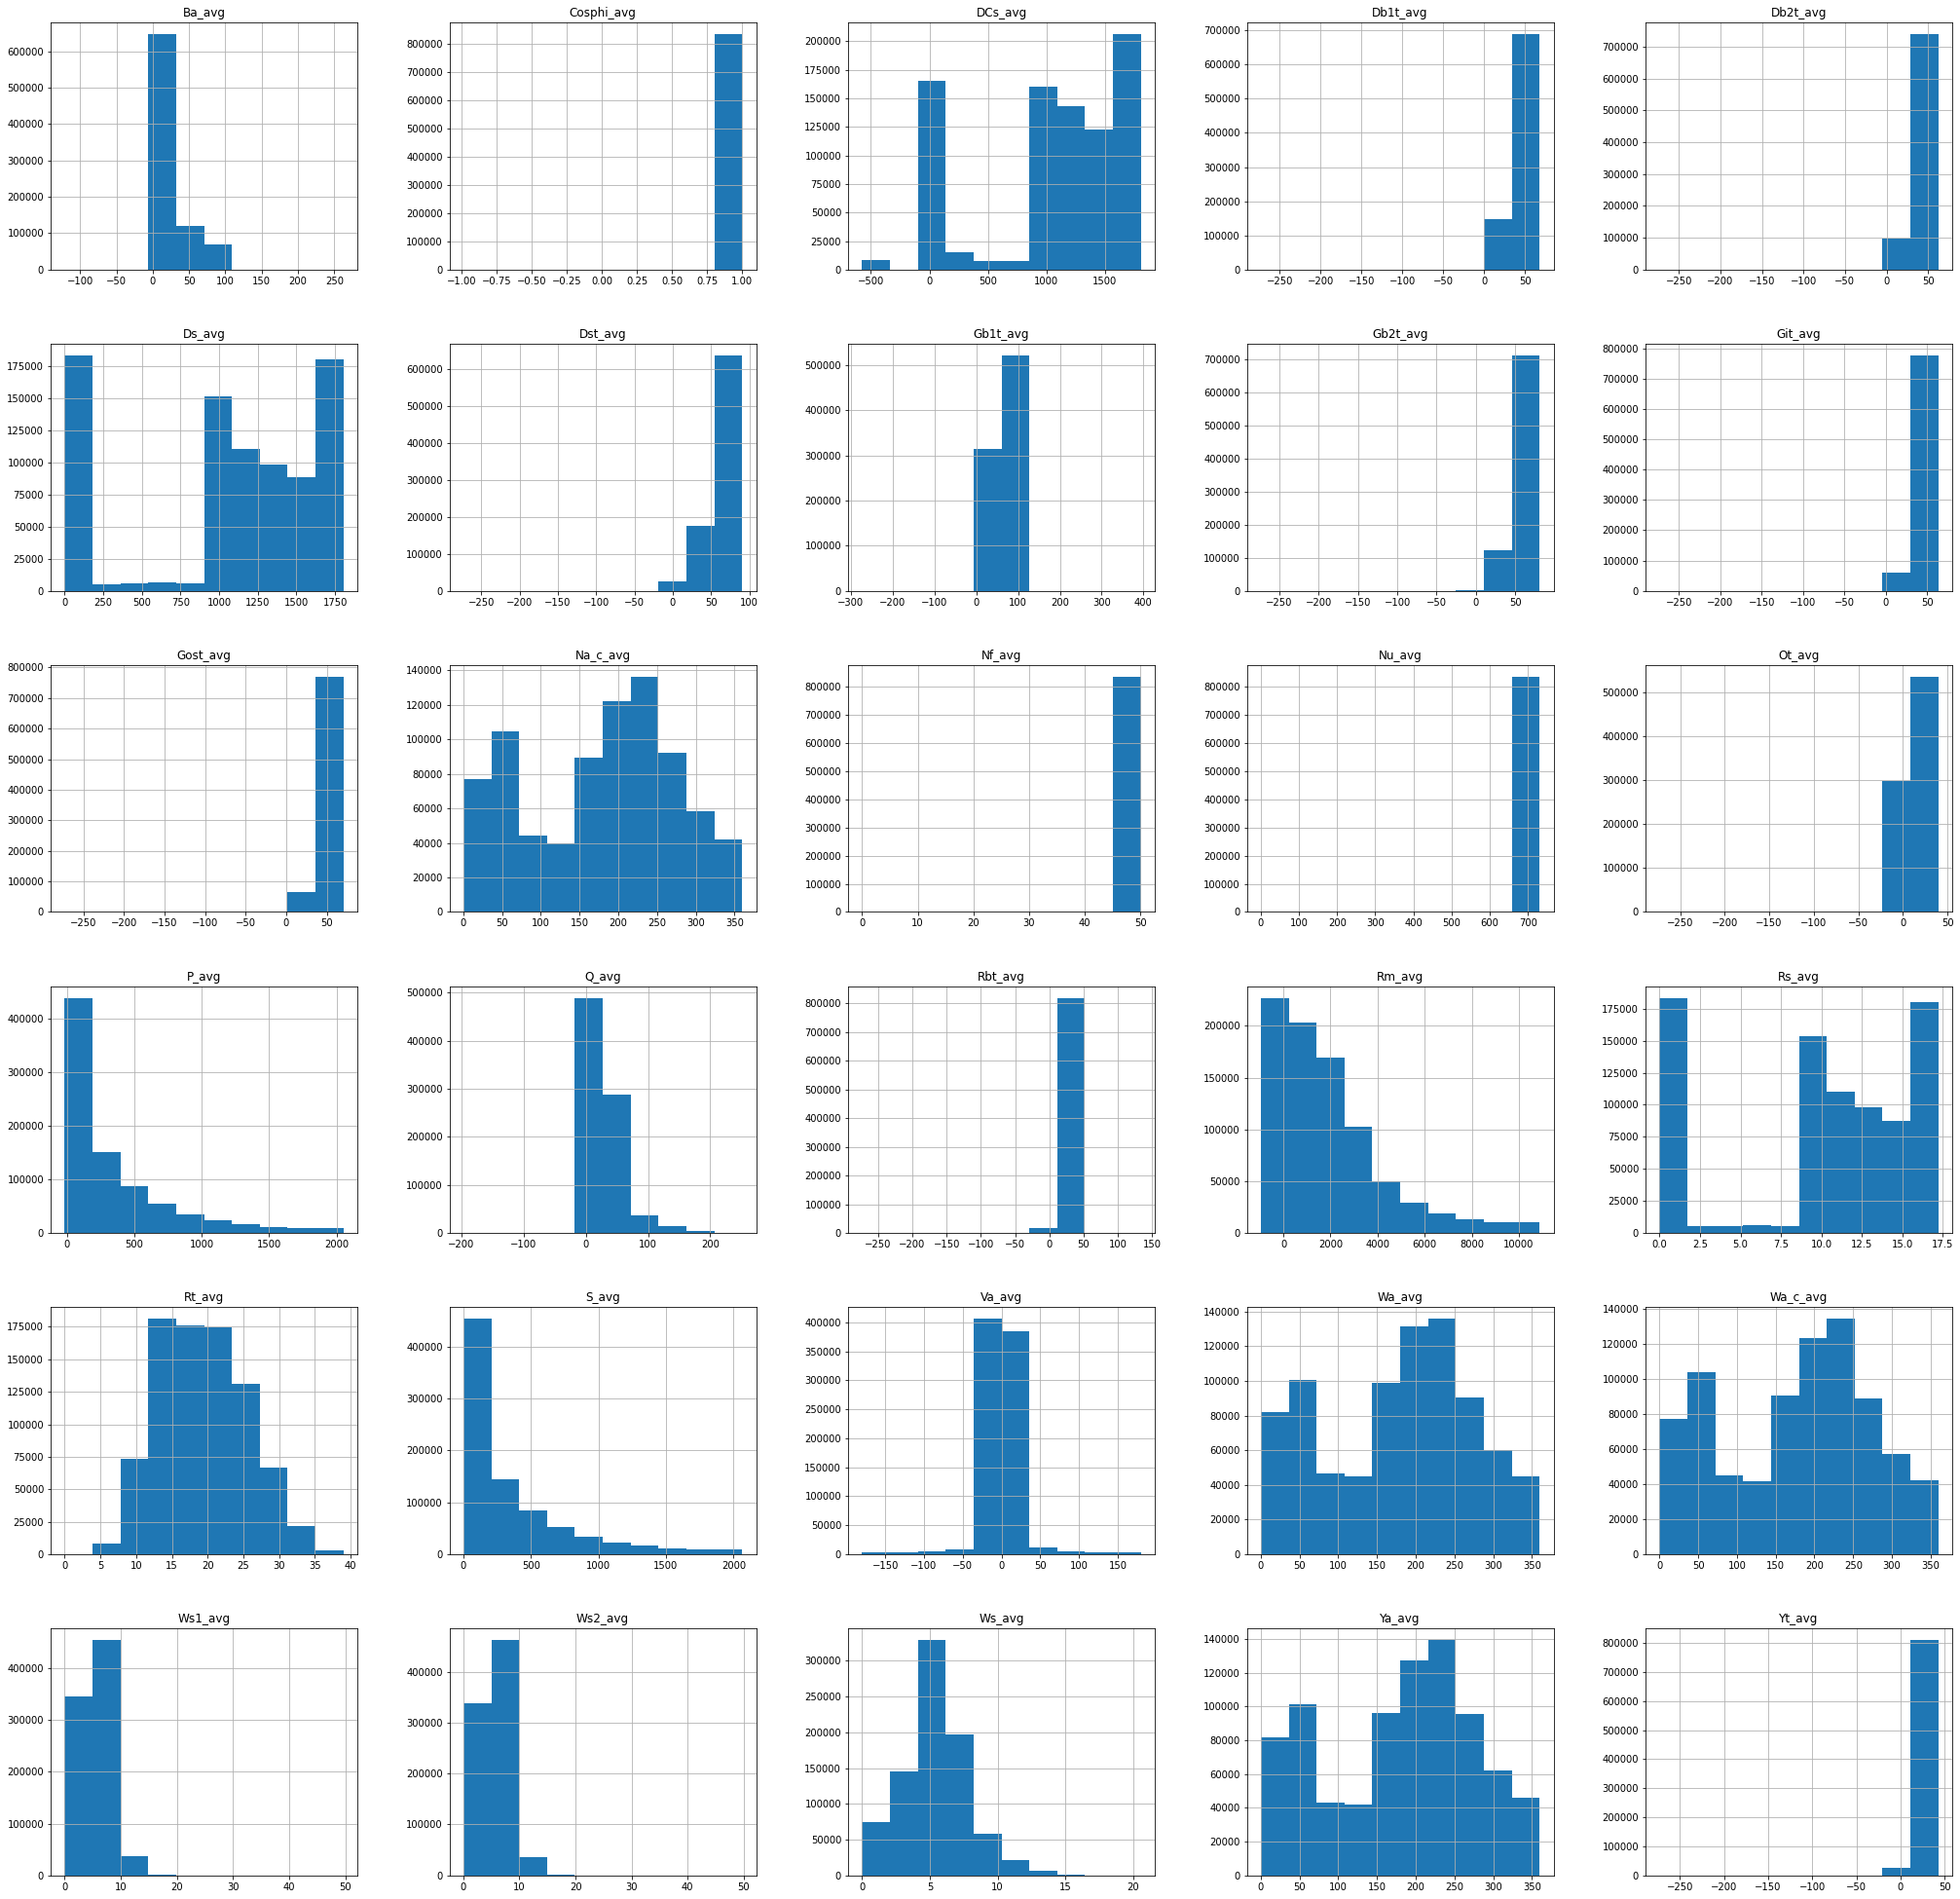

In [14]:
# Let us visualize distribution of different features.
pd.DataFrame.hist(df_avg, figsize = [35,35]);

We can notice the presence of outliers in reactive power feature distribution. Furthermore there is a large gap between the distribution of minimum features and maximum features. This makes reasonable to choice of the use of features average. And the standard deviation is varied around 10 percent of the maximum size in various cases.

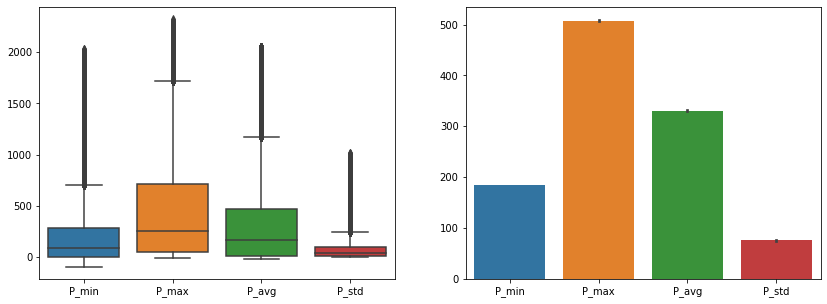

In [15]:
# Let us visualize power boxplot
fig, ax = plt.subplots(1, 2, figsize =(14,5))
(ax1, ax2)=ax
sns.boxplot(data=df.loc[:,['P_min','P_max','P_avg', 'P_std']], orient = 'v', ax= ax1)

sns.barplot(data=df.loc[:,['P_min','P_max','P_avg', 'P_std']], orient = 'v', ax= ax2);

We can notice the presence of outliers in active power feature distribution. Furthermore there is great difference between the distribution of the minimum active power and the maximum active power. This makes reasonable to choice of the use  of active power average.  

Let us deal with outliers presence show by the box plot visualization.

In [16]:
# Define a function remove outlier from data set
def remove_outlier(df_in, column_name):
    first_quartile = df_in[column_name].quantile(0.25)
    third_quartile = df_in[column_name].quantile(0.75)
    iqr = third_quartile - first_quartile # Interquartile range
    fence_low = first_quartile - 1.5*iqr
    fence_high = third_quartile + 1.5*iqr
    data_out = df_in.loc[(df_in[column_name] > fence_low) & (df_in[column_name] < fence_high)]
    return data_out

In [17]:
df_out = remove_outlier(df, 'P_avg')
df = remove_outlier(df_out, 'P_min')
df_out = remove_outlier(df, 'P_max')
df = remove_outlier(df_out, 'P_std')
df

Wind_turbine_name                  Date_time     Ba_avg     Ba_min  \
0                 R80711  2013-01-07 01:20:00+01:00  41.160000  -1.000000   
1                 R80711  2013-01-05 22:20:00+01:00  -1.000000  -1.000000   
2                 R80711  2013-01-06 08:30:00+01:00  -1.000000  -1.000000   
3                 R80711  2013-01-05 21:10:00+01:00  44.990002  44.990002   
4                 R80711  2013-01-06 11:20:00+01:00  -0.760000  -1.000000   
...                  ...                        ...        ...        ...   
840368            R80721  2016-03-18 13:20:00+01:00  44.990002  44.990002   
840370            R80721  2016-03-18 18:50:00+01:00  -1.000000  -1.000000   
840371            R80790  2014-01-04 10:50:00+01:00  -0.990000  -1.010000   
840372            R80721  2016-03-18 23:10:00+01:00  -1.000000  -1.000000   
840373            R80790  2014-01-04 18:50:00+01:00  -0.960000  -0.960000   

           Ba_max  Ba_std     Rt_avg  Rt_min  Rt_max  Rt_std  ...    Rbt_avg  \
0       44.990002   11.27  12.650000    12.0   13.00    0.41  ...  18.299999   
1       -0.870000    0.01  12.950000    12.0   13.00    0.16  ...  20.709999   
2       -1.000000    0.00  13.740000    13.0   14.00    0.35  ...  22.000000   
3       44.990002    0.00  12.140000    12.0   13.00    0.27  ...  19.400000   
4        0.000000    0.40  13.780000    13.0   14.00    0.35  ...  23.700001   
...           ...     ...        ...     ...     ...     ...  ...        ...   
840368  44.990002    0.00  19.000000    19.0   19.00    0.00  ...  23.020000   
840370  -1.000000    0.00  19.000000    19.0   19.00    0.00  ...  25.010000   
840371  -0.810000    0.01  16.209999    16.0   17.00    0.31  ...  28.980000   
840372  -1.000000    0.00  19.010000    19.0   19.65    0.06  ...  26.360001   
840373  -0.950000    0.00  17.000000    17.0   17.00    0.00  ...  29.930000   

          Rbt_min    Rbt_max  Rbt_std       Rm_avg      Rm_min       Rm_max  \
0       18.299999  18.299999     0.00   -69.540001  -311.60999   -15.660000   
1       20.500000  20.900000     0.12  1302.110000   470.04001  2110.980000   
2       22.000000  22.100000     0.01   851.960020   465.51999  1101.860000   
3       19.400000  19.600000     0.02   -76.339996  -141.82001   -39.889999   
4       23.600000  23.799999     0.02   785.609990     7.49000  1321.530000   
...           ...        ...      ...          ...         ...          ...   
840368  23.000000  23.100000     0.03   -96.209999  -173.49001   -66.199997   
840370  24.799999  25.100000     0.05  1341.150000  1106.41000  1479.920000   
840371  28.799999  29.200001     0.11  1665.000000   689.12000  2368.050000   
840372  26.200001  26.400000     0.07   835.229980   542.45001  1085.810100   
840373  29.700001  30.000000     0.05  2588.790000  1778.43010  3348.280000   

            Rm_std    Wa_c_avg    Na_c_avg  
0        30.809999   37.770000   33.750000  
1       389.280000  313.350010  279.929990  
2       122.770000  241.590000  246.679990  
3        19.170000  280.750000  274.120000  
4       381.579990  293.010010  293.870000  
...            ...         ...         ...  
840368   18.240000   18.290001   18.290001  
840370  106.410000    8.479999    8.479999  
840371  474.980010  138.630000  158.130000  
840372  109.540000    4.730000    4.730000  
840373  350.660000  131.730000  153.780000  

[672743 rows x 120 columns]

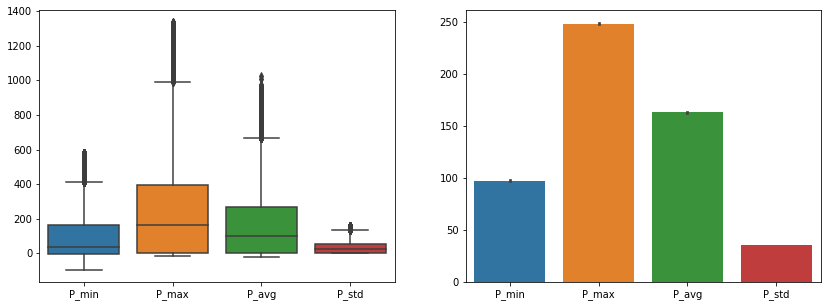

In [18]:
# Let us check visualization of active power boxplot
fig, ax = plt.subplots(1, 2, figsize =(14,5))
(ax1, ax2)=ax
sns.boxplot(data=df.loc[:,['P_min','P_max','P_avg', 'P_std']], orient = 'v', ax= ax1)

sns.barplot(data=df.loc[:,['P_min','P_max','P_avg', 'P_std']], orient = 'v', ax= ax2);

After we have removed outliers, we still have a lot of outliers that is the reason why median will be appropriate to fill the missing values. 

#### Evaluates Reactive power: Q.

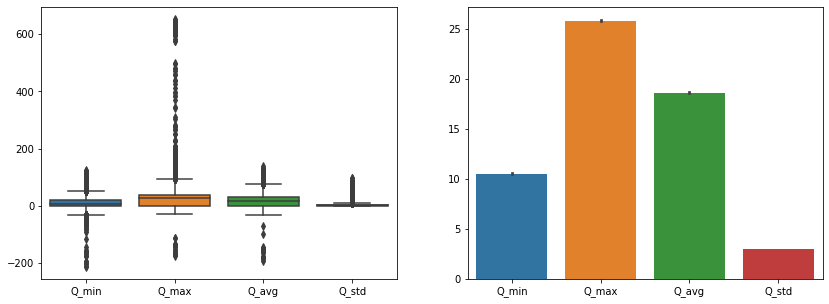

In [19]:
# Let us visualize Reactive power boxplot
fig, ax = plt.subplots(1, 2, figsize =(14,5))
(ax1, ax2)=ax
sns.boxplot(data=df.loc[:,['Q_min','Q_max','Q_avg', 'Q_std']], orient = 'v', ax= ax1)

sns.barplot(data=df.loc[:,['Q_min','Q_max','Q_avg', 'Q_std']], orient = 'v', ax= ax2);

We can notice the presence of outliers in reactive power feature distribution. Furthermore there is great difference between the distribution of the minimum reactive power and the maximum reactive power. This makes reasonable to choice of the use of reactive power average.

Let us deal with outliers.

In [20]:
df_out = remove_outlier(df, 'Q_avg')
df = remove_outlier(df_out, 'Q_min')
df_out = remove_outlier(df, 'Q_max')
df = remove_outlier(df_out, 'Q_std')
df.shape

(640215, 120)

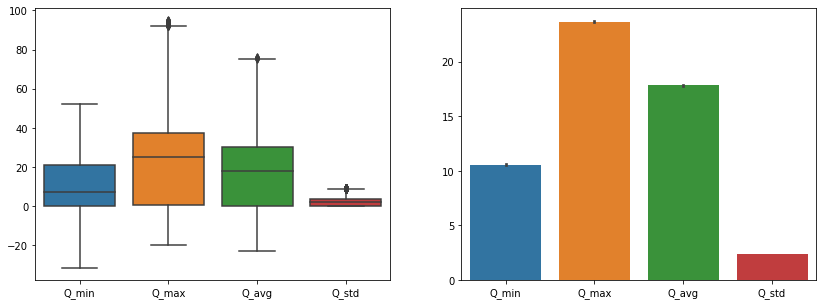

In [21]:
# Let us check visualization of Reactive power boxplot
fig, ax = plt.subplots(1, 2, figsize =(14,5))
(ax1, ax2)=ax
sns.boxplot(data=df.loc[:,['Q_min','Q_max','Q_avg', 'Q_std']], orient = 'v', ax= ax1)

sns.barplot(data=df.loc[:,['Q_min','Q_max','Q_avg', 'Q_std']], orient = 'v', ax= ax2);

Here it is ok, we are going to use mean to fill the missing values

#### Evaluates Apparent power: S.

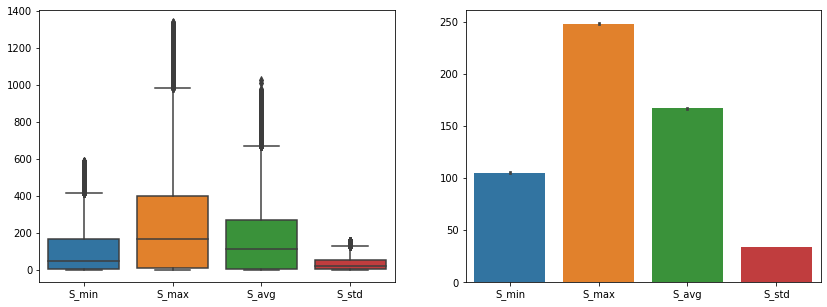

In [22]:
# Let us visualize apparent power boxplot
fig, ax = plt.subplots(1, 2, figsize =(14,5))
(ax1, ax2)=ax
sns.boxplot(data=df.loc[:,['S_min','S_max','S_avg', 'S_std']], orient = 'v', ax= ax1)

sns.barplot(data=df.loc[:,['S_min','S_max','S_avg', 'S_std']], orient = 'v', ax= ax2);

We can notice the presence of outliers in apparent power feature distribution. Furthermore there is great difference between the distribution of the minimum apparent power and the maximum apparent power. This makes reasonable to choice of the use of apparent power average.

Let us deal with outliers.

In [23]:
df_out = remove_outlier(df, 'S_avg')
df = remove_outlier(df_out, 'S_min')
df_out = remove_outlier(df, 'S_max')
df = remove_outlier(df_out, 'S_std')
df.shape

(578037, 120)

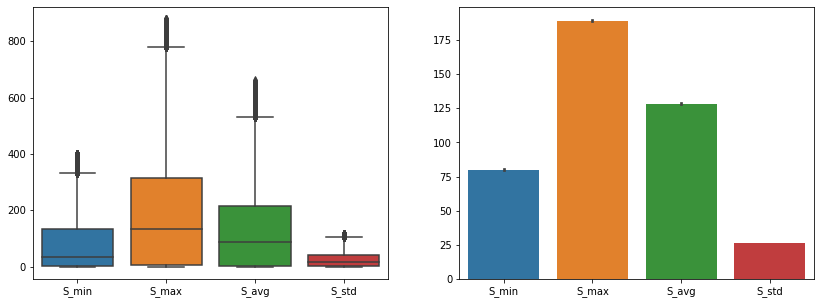

In [24]:
# Let us check visualization of apparent power boxplot
fig, ax = plt.subplots(1, 2, figsize =(14,5))
(ax1, ax2)=ax
sns.boxplot(data=df.loc[:,['S_min','S_max','S_avg', 'S_std']], orient = 'v', ax= ax1)

sns.barplot(data=df.loc[:,['S_min','S_max','S_avg', 'S_std']], orient = 'v', ax= ax2);

After we have removed outliers, we still have a lot of outliers that is the reason why median will be appropriate to fill the missing values.

#### Evaluate torque: Rm

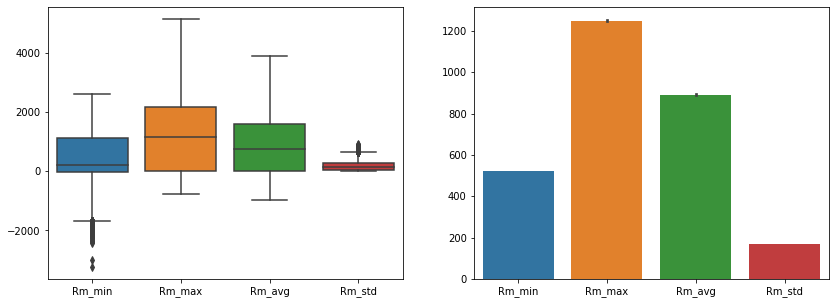

In [25]:
# Let us visualize torque boxplot
fig, ax = plt.subplots(1, 2, figsize =(14,5))
(ax1, ax2)=ax
sns.boxplot(data=df.loc[:,['Rm_min','Rm_max','Rm_avg', 'Rm_std']], orient = 'v', ax= ax1)

sns.barplot(data=df.loc[:,['Rm_min','Rm_max','Rm_avg', 'Rm_std']], orient = 'v', ax= ax2);

We can notice the presence of outliers in torque feature distribution. Furthermore there is great difference between the distribution of the minimum torque and the maximum torque. This makes reasonable to choice of the use of torque average.

Let us deal with outliers.

In [26]:
df_out = remove_outlier(df, 'Rm_avg')
df = remove_outlier(df_out, 'Rm_min')
df_out = remove_outlier(df, 'Rm_max')
df = remove_outlier(df_out, 'Rm_std')
df.shape

(575689, 120)

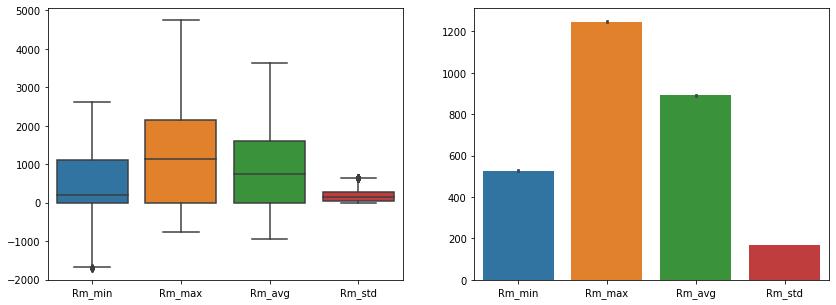

In [27]:
# Let us check visualization of torque boxplot
fig, ax = plt.subplots(1, 2, figsize =(14,5))
(ax1, ax2)=ax
sns.boxplot(data=df.loc[:,['Rm_min','Rm_max','Rm_avg', 'Rm_std']], orient = 'v', ax= ax1)

sns.barplot(data=df.loc[:,['Rm_min','Rm_max','Rm_avg', 'Rm_std']], orient = 'v', ax= ax2);

Here it is ok, we are going to use mean to fill the missing values. 

#### Evaluate wind speed: Ws

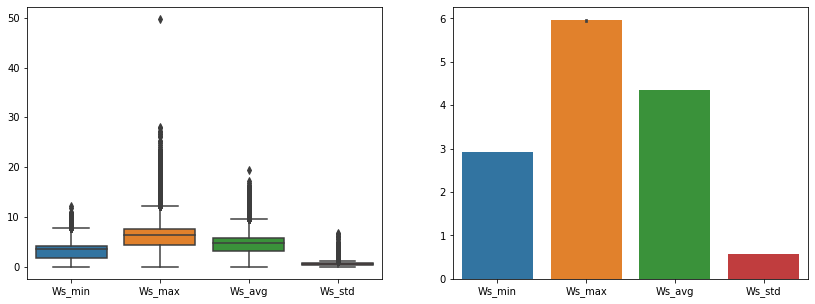

In [28]:
# Let us visualize Wind Speed boxplot
fig, ax = plt.subplots(1, 2, figsize =(14,5))
(ax1, ax2)=ax
sns.boxplot(data=df.loc[:,['Ws_min','Ws_max','Ws_avg', 'Ws_std']], orient = 'v', ax= ax1)

sns.barplot(data=df.loc[:,['Ws_min','Ws_max','Ws_avg', 'Ws_std']], orient = 'v', ax= ax2);

We can notice the presence of outliers in wind speed feature distribution. Furthermore there is great difference between the distribution of the minimum wind speed and the maximum wind speed. This makes reasonable to choice of the use of wind speed average.

Let us deal with outliers.

In [29]:
df_out = remove_outlier(df, 'Ws_avg')
df = remove_outlier(df_out, 'Ws_min')
df_out = remove_outlier(df, 'Ws_max')
df = remove_outlier(df_out, 'Ws_std')
df.shape

(556617, 120)

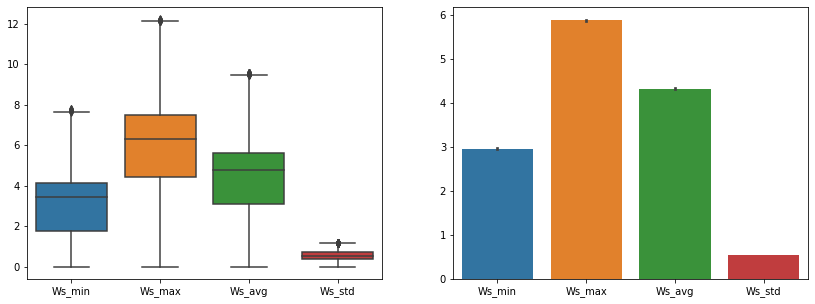

In [30]:
# Let us check visualization of Wind Speed boxplot
fig, ax = plt.subplots(1, 2, figsize =(14,5))
(ax1, ax2)=ax
sns.boxplot(data=df.loc[:,['Ws_min','Ws_max','Ws_avg', 'Ws_std']], orient = 'v', ax= ax1)

sns.barplot(data=df.loc[:,['Ws_min','Ws_max','Ws_avg', 'Ws_std']], orient = 'v', ax= ax2);

Here it is ok, we are going to use mean to fill the missing values.

#### Evaluate wind speed 1: Ws1

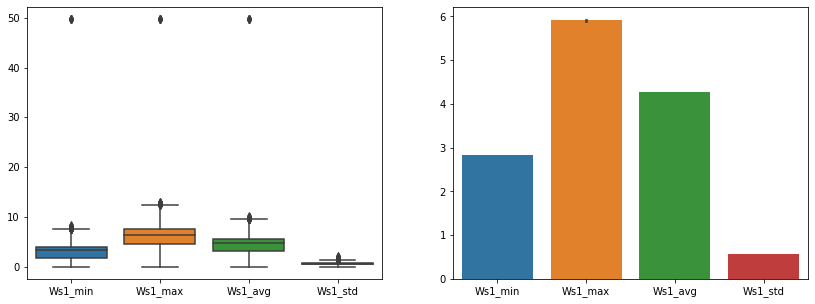

In [31]:
# Let us visualize Wind Speed 1 boxplot
fig, ax = plt.subplots(1, 2, figsize =(14,5))
(ax1, ax2)=ax
sns.boxplot(data=df.loc[:,['Ws1_min','Ws1_max','Ws1_avg', 'Ws1_std']], orient = 'v', ax= ax1)

sns.barplot(data=df.loc[:,['Ws1_min','Ws1_max','Ws1_avg', 'Ws1_std']], orient = 'v', ax= ax2);

We can notice the presence of outliers in wind speed 1 feature distribution. Furthermore there is great difference between the distribution of the minimum wind speed 1 and the maximum wind speed 1. This makes reasonable to choice of the use of wind speed 1 average.

Let us deal with outliers.

In [32]:
df_out = remove_outlier(df, 'Ws1_avg')
df = remove_outlier(df_out, 'Ws1_min')
df_out = remove_outlier(df, 'Ws1_max')
df = remove_outlier(df_out, 'Ws1_std')
df.shape

(551914, 120)

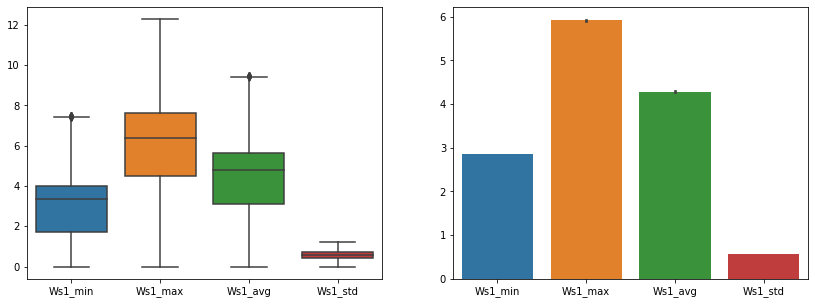

In [33]:
# Let us check visualization of Wind Speed 1 boxplot
fig, ax = plt.subplots(1, 2, figsize =(14,5))
(ax1, ax2)=ax
sns.boxplot(data=df.loc[:,['Ws1_min','Ws1_max','Ws1_avg', 'Ws1_std']], orient = 'v', ax= ax1)

sns.barplot(data=df.loc[:,['Ws1_min','Ws1_max','Ws1_avg', 'Ws1_std']], orient = 'v', ax= ax2);

Here it is ok, we are going to use mean to fill the missing values.

#### Evaluate wind speed 2: Ws2

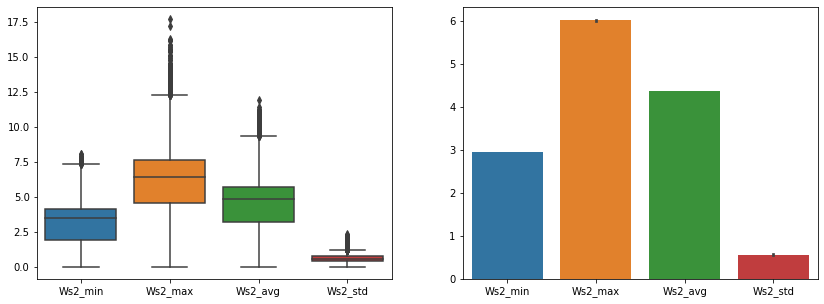

In [34]:
# Let us visualize Wind Speed 2 boxplot
fig, ax = plt.subplots(1, 2, figsize =(14,5))
(ax1, ax2)=ax
sns.boxplot(data=df.loc[:,['Ws2_min','Ws2_max','Ws2_avg', 'Ws2_std']], orient = 'v', ax= ax1)

sns.barplot(data=df.loc[:,['Ws2_min','Ws2_max','Ws2_avg', 'Ws2_std']], orient = 'v', ax= ax2);

We can notice the presence of outliers in wind speed 2 feature distribution. Furthermore there is great difference between the distribution of the minimum wind speed 2 and the maximum wind speed 2. This makes reasonable to choice of the use of wind speed 2 average.

Let us deal with outliers.

In [35]:
df_out = remove_outlier(df, 'Ws2_avg')
df = remove_outlier(df_out, 'Ws2_min')
df_out = remove_outlier(df, 'Ws2_max')
df = remove_outlier(df_out, 'Ws2_std')
df.shape

(548173, 120)

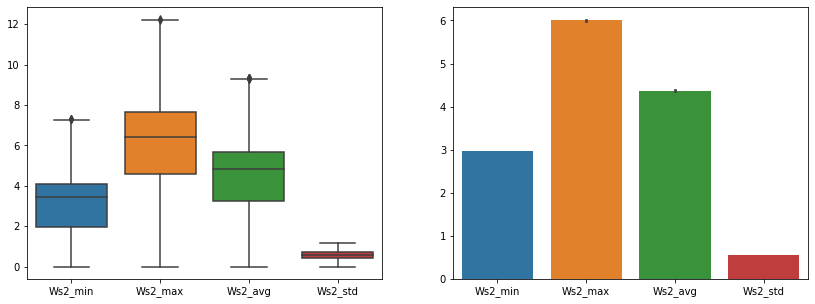

In [36]:
# Let us check visualization of Wind Speed 2 boxplot
fig, ax = plt.subplots(1, 2, figsize =(14,5))
(ax1, ax2)=ax
sns.boxplot(data=df.loc[:,['Ws2_min','Ws2_max','Ws2_avg', 'Ws2_std']], orient = 'v', ax= ax1)

sns.barplot(data=df.loc[:,['Ws2_min','Ws2_max','Ws2_avg', 'Ws2_std']], orient = 'v', ax= ax2);

Here it is ok, we are going to use mean to fill the missing values.

#### Evaluates Rotor speed: Rs 

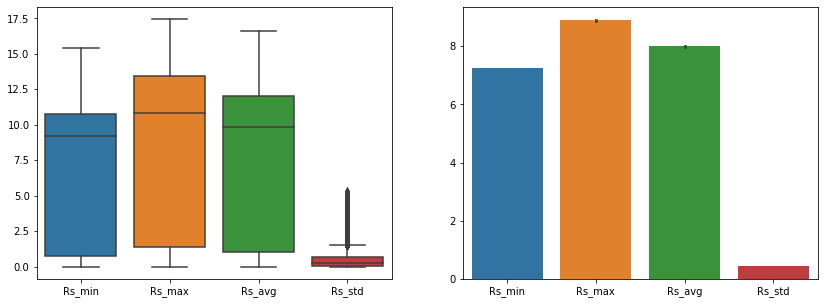

In [37]:
# Let us visualize  Rotor speed boxplot
fig, ax = plt.subplots(1, 2, figsize =(14,5))
(ax1, ax2)=ax
sns.boxplot(data=df.loc[:,['Rs_min','Rs_max','Rs_avg', 'Rs_std']], orient = 'v', ax= ax1)

sns.barplot(data=df.loc[:,['Rs_min','Rs_max','Rs_avg', 'Rs_std']], orient = 'v', ax= ax2);

We can notice the presence of outliers in Rotor speed feature distribution. Furthermore there is great difference between the distribution of the minimum Rotor speed and the maximum Rotor speed. This makes reasonable to choice of the use of Rotor speed average.

Let us deal with outliers.

In [38]:
df_out = remove_outlier(df, 'Rs_avg')
df = remove_outlier(df_out, 'Rs_min')
df_out = remove_outlier(df, 'Rs_max')
df = remove_outlier(df_out, 'Rs_std')
df.shape

(538034, 120)

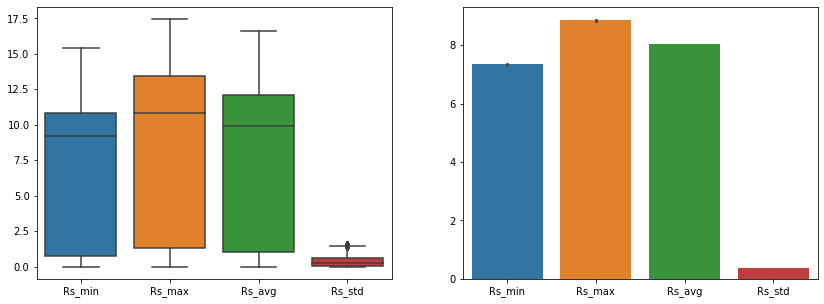

In [39]:
# Let us check visualization of  Rotor Speed boxplot
fig, ax = plt.subplots(1, 2, figsize =(14,5))
(ax1, ax2)=ax
sns.boxplot(data=df.loc[:,['Rs_min','Rs_max','Rs_avg', 'Rs_std']], orient = 'v', ax= ax1)

sns.barplot(data=df.loc[:,['Rs_min','Rs_max','Rs_avg', 'Rs_std']], orient = 'v', ax= ax2);

Here it is ok, we are going to use mean to fill the missing values.

#### Evaluates Generator speed: Ds

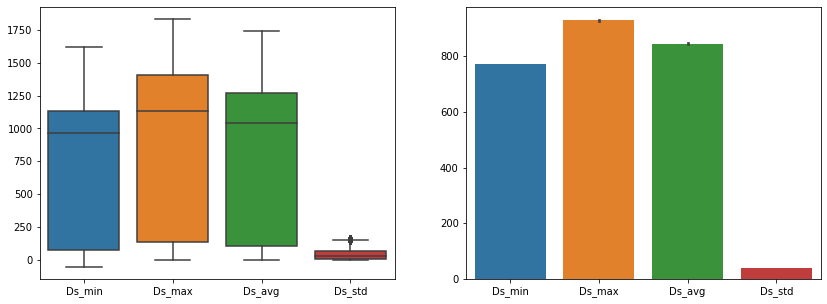

In [40]:
# Let us visualize  Generator speed boxplot
fig, ax = plt.subplots(1, 2, figsize =(14,5))
(ax1, ax2)=ax
sns.boxplot(data=df.loc[:,['Ds_min','Ds_max','Ds_avg', 'Ds_std']], orient = 'v', ax= ax1)

sns.barplot(data=df.loc[:,['Ds_min','Ds_max','Ds_avg', 'Ds_std']], orient = 'v', ax= ax2);

We can notice the presence of outliers in Generator speed  feature distribution. Furthermore there is great difference between the distribution of the minimum Generator speed and the maximum Generator speed. This makes reasonable to choice of the use of Generator speed average.

Let us deal with outliers.

In [41]:
df_out = remove_outlier(df, 'Ds_avg')
df = remove_outlier(df_out, 'Ds_min')
df_out = remove_outlier(df, 'Ds_max')
df = remove_outlier(df_out, 'Ds_std')
df.shape

(536098, 120)

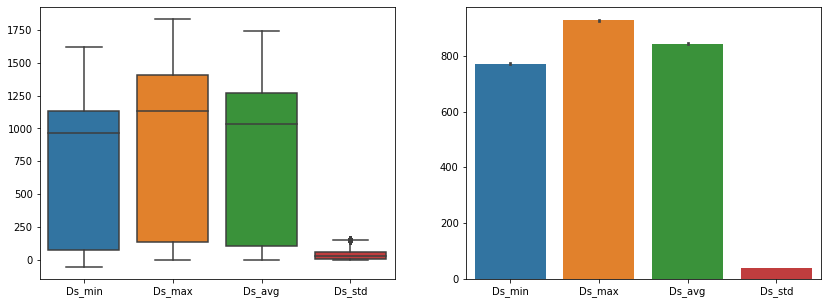

In [42]:
# Let us check visualization of Generator Speed boxplot
fig, ax = plt.subplots(1, 2, figsize =(14,5))
(ax1, ax2)=ax
sns.boxplot(data=df.loc[:,['Ds_min','Ds_max','Ds_avg', 'Ds_std']], orient = 'v', ax= ax1)

sns.barplot(data=df.loc[:,['Ds_min','Ds_max','Ds_avg', 'Ds_std']], orient = 'v', ax= ax2);

Here it is ok, we are going to use mean to fill the missing values.

#### Evaluates Generator Converter speed: DCs

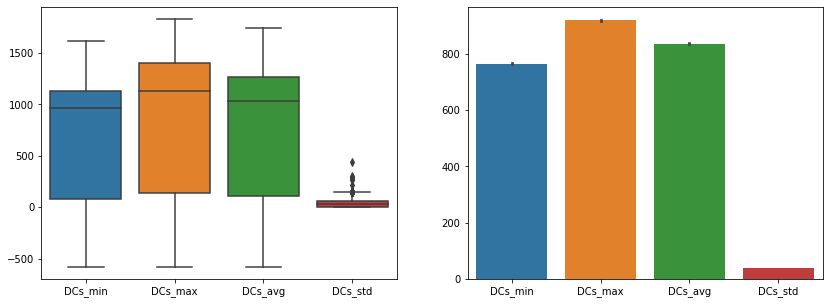

In [43]:
# Let us visualize  Generator speed boxplot
fig, ax = plt.subplots(1, 2, figsize =(14,5))
(ax1, ax2)=ax
sns.boxplot(data=df.loc[:,['DCs_min','DCs_max','DCs_avg', 'DCs_std']], orient = 'v', ax= ax1);
sns.barplot(data=df.loc[:,['DCs_min','DCs_max','DCs_avg', 'DCs_std']], orient = 'v', ax= ax2);

We can notice the presence of outliers in Generator Converter speed  feature distribution. Furthermore there is great difference between the distribution of the minimum Generator Converter speed and the maximum Generator Converter speed. This makes reasonable to choice of the use of Generator Converter speed average.

Let us deal with outliers.

In [44]:
df_out = remove_outlier(df, 'DCs_avg')
df = remove_outlier(df_out, 'DCs_min')
df_out = remove_outlier(df, 'DCs_max')
df = remove_outlier(df_out, 'DCs_std')
df.shape

(536055, 120)

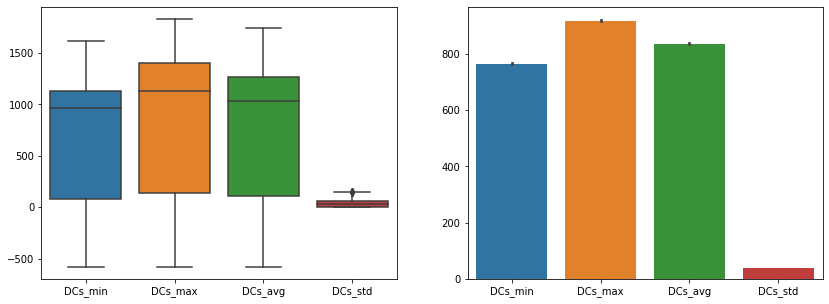

In [45]:
# Let us check visualization of Generator Converter Speed boxplot
fig, ax = plt.subplots(1, 2, figsize =(14,5))
(ax1, ax2) = ax
sns.boxplot(data = df.loc[:,['DCs_min', 'DCs_max', 'DCs_avg', 'DCs_std']], orient = 'v', ax= ax1)

sns.barplot(data = df.loc[:,['DCs_min', 'DCs_max', 'DCs_avg', 'DCs_std']], orient = 'v', ax= ax2);

Here it is ok, we are going to use mean to fill the missing values.

#### Evaluates "Gearbox bearing 1 temperature": Gb1t

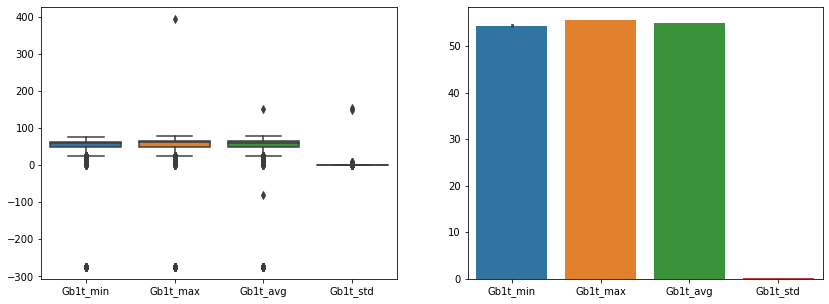

In [46]:
# Let us visualize  Gearbox bearing 1 temperature boxplot
fig, ax = plt.subplots(1, 2, figsize =(14,5))
(ax1, ax2)  = ax
sns.boxplot(data = df.loc[:,['Gb1t_min', 'Gb1t_max', 'Gb1t_avg', 'Gb1t_std']], orient = 'v', ax= ax1)

sns.barplot(data = df.loc[:,['Gb1t_min', 'Gb1t_max', 'Gb1t_avg', 'Gb1t_std']], orient = 'v', ax= ax2);

We can notice the presence of outliers in Gearbox bearing 1 temperature feature distribution. Furthermore there is great difference between the distribution of the minimumGearbox bearing 1 temperature and the maximum Gearbox bearing 1 temperature. This makes reasonable to choice of the use of Gearbox bearing 1 temperature average.

Let us deal with outliers

In [47]:
df_out = remove_outlier(df, 'Gb1t_avg')
df = remove_outlier(df_out, 'Gb1t_min')
df_out = remove_outlier(df, 'Gb1t_max')
df = remove_outlier(df_out, 'Gb1t_std')
df.shape

(442593, 120)

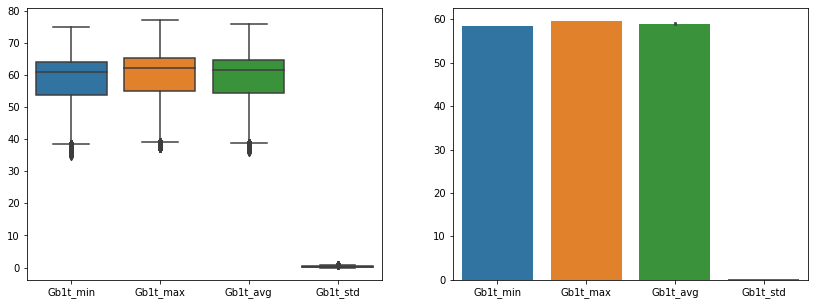

In [48]:
# Let us check visualization of Gearbox bearing 1 temperature boxplot
fig, ax = plt.subplots(1, 2, figsize =(14,5))
(ax1, ax2) = ax
sns.boxplot(data = df.loc[:,['Gb1t_min','Gb1t_max','Gb1t_avg', 'Gb1t_std']], orient = 'v', ax= ax1)

sns.barplot(data = df.loc[:,['Gb1t_min','Gb1t_max','Gb1t_avg', 'Gb1t_std']], orient = 'v', ax= ax2);

Here it is ok, we are going to use mean to fill the missing values.

#### Evaluates "Gearbox bearing 2 temperature": Gb2t

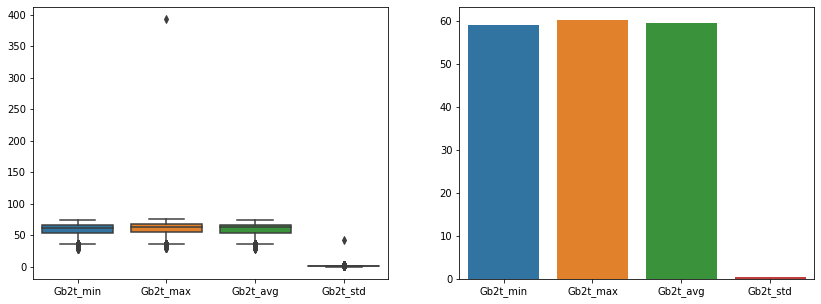

In [49]:
# Let us visualize  Gearbox bearing 2 temperature boxplot
fig, ax = plt.subplots(1, 2, figsize =(14,5))
(ax1, ax2)=ax
sns.boxplot(data = df.loc[:,['Gb2t_min','Gb2t_max','Gb2t_avg', 'Gb2t_std']], orient = 'v', ax= ax1)

sns.barplot(data = df.loc[:,['Gb2t_min','Gb2t_max','Gb2t_avg', 'Gb2t_std']], orient = 'v', ax= ax2);

We can notice the presence of outliers in Gearbox bearing 2 temperature feature distribution. Furthermore there is great difference between the distribution of the minimumGearbox bearing 2 temperature and the maximum Gearbox bearing 2 temperature. This makes reasonable to choice of the use of Gearbox bearing 2 temperature average.

Let us deal with outliers

In [50]:
df_out = remove_outlier(df, 'Gb2t_avg')
df = remove_outlier(df_out, 'Gb2t_min')
df_out = remove_outlier(df, 'Gb2t_max')
df = remove_outlier(df_out, 'Gb2t_std')
df.shape

(431646, 120)

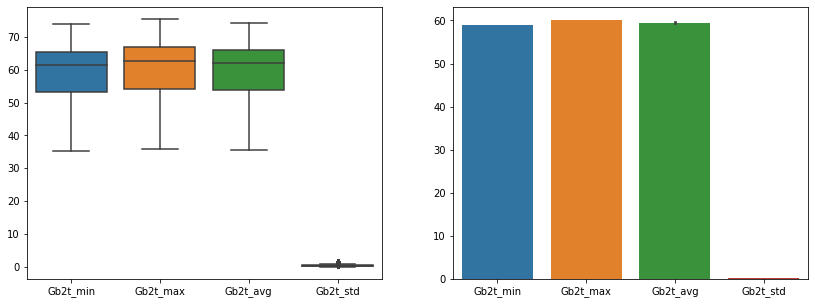

In [51]:
# Let us check visualization of Gearbox bearing 2 temperature boxplot
fig, ax = plt.subplots(1, 2, figsize =(14,5))
(ax1, ax2)=ax
sns.boxplot(data=df.loc[:,['Gb2t_min','Gb2t_max','Gb2t_avg', 'Gb2t_std']], orient = 'v', ax= ax1)

sns.barplot(data=df.loc[:,['Gb2t_min','Gb2t_max','Gb2t_avg', 'Gb2t_std']], orient = 'v', ax= ax2);

Here it is ok, we are going to use mean to fill the missing values.

### Find missing values

A dataset with missing values will not be usable for fitting and testing a model. Fill in missing values in a way suitable for the model.

In [52]:
# Let us identify any missing values, and fill in missing values
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing

Total   Percent
Na_c_avg           17084  3.957873
Wa_c_avg           17084  3.957873
Cosphi_min             0  0.000000
Cosphi_max             0  0.000000
Cosphi_std             0  0.000000
...                  ...       ...
Ws_max                 0  0.000000
Ws_std                 0  0.000000
Wa_avg                 0  0.000000
Wa_min                 0  0.000000
Wind_turbine_name      0  0.000000

[120 rows x 2 columns]

In [53]:
df["Na_c_avg"] = df["Na_c_avg"].fillna(df["Na_c_avg"].mean())
df["Wa_c_avg"] = df["Wa_c_avg"].fillna(df["Wa_c_avg"].mean())

/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [54]:
# Let us identify any missing values, and fill in missing values
df.isnull().sum().sort_values(ascending=False)

Na_c_avg             0
Wa_c_avg             0
Cosphi_min           0
Cosphi_max           0
Cosphi_std           0
                    ..
Ws_max               0
Ws_std               0
Wa_avg               0
Wa_min               0
Wind_turbine_name    0
Length: 120, dtype: int64

Now let's try to figure out the normality of our Active Power average.

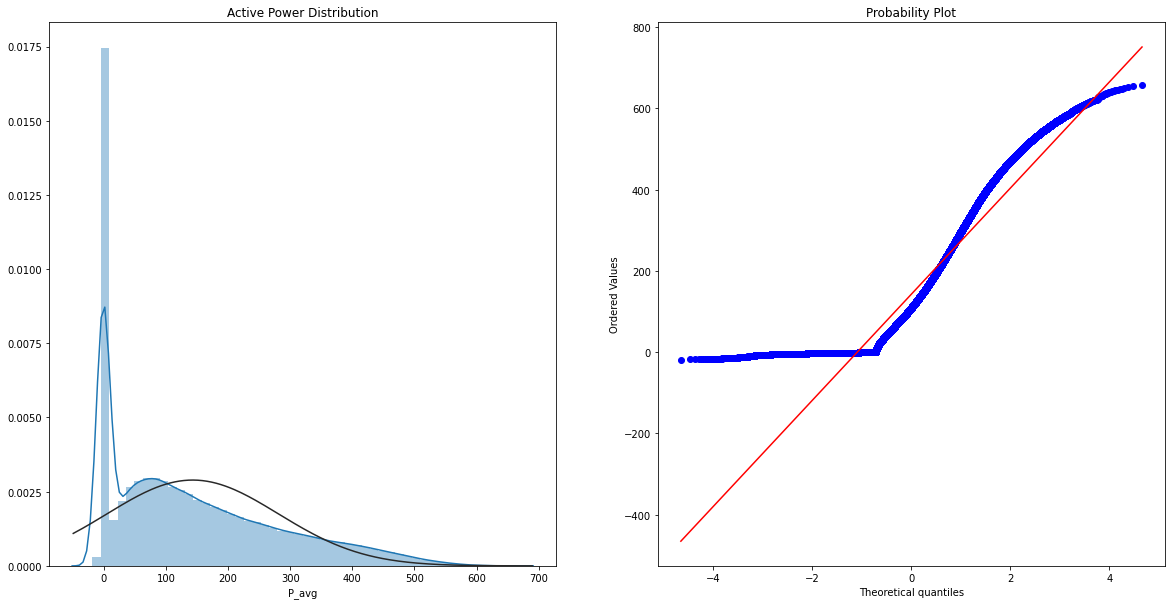

Skewness: 0.872262
Kurtosis: -0.072409


In [55]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.title("Active Power Distribution")
sns.distplot(df.P_avg, fit=stats.norm)
plt.subplot(1, 2, 2)
stats.probplot(df.P_avg, plot=plt)
plt.show()
print("Skewness: %f" % df.P_avg.skew())
print("Kurtosis: %f" % df.P_avg.kurt())

Now this is interesting, we have our dependent variable right/poitive skewed and has a peak value too between range -18.49 and 2051.87. and does not follow the diagonal line.

But everything's not lost. A simple data transformation can solve the problem. I learnt it in my data models and decision making curriculum that in case of positive skewness, log transformations usually works well.

What other transformations we can use ?

KeyError: 'P_avg'

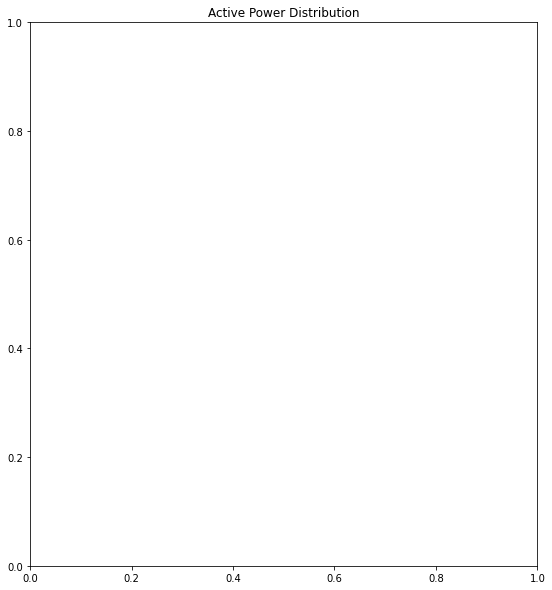

In [182]:
from scipy import stats
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)

plt.title("Active Power Distribution")
sns.distplot(np.log(df['P_avg']), fit=stats.norm)
plt.subplot(1, 2, 2)
stats.probplot(np.log(df.P_avg), plot=plt)
plt.show()
print("Skewness: %f" % np.log(df.P_avg).skew())
print("Kurtosis: %f" % np.log(df.P_avg).kurt())

## Exploratory Data Analysis

Here we are going use matrix correlation on the average of features to explore how each variable or feature is link to the average of active power and then proceed to the feature selection. 

In [57]:
df_avg =df[["Ba_avg", "Rbt_avg", "Rm_avg", "Na_c_avg", "Wa_c_avg", "Rs_avg", "Nu_avg", "Nf_avg", "Ot_avg", "Va_avg", "Wa_avg", "Ws_avg", "Ws2_avg", "Ws1_avg", "Yt_avg", "Ya_avg", "Gost_avg", "Git_avg", "Gb2t_avg", "Gb1t_avg", "Dst_avg", "Db2t_avg", "Db1t_avg", "Ds_avg", "P_avg", "Cosphi_avg", "S_avg", "Q_avg", "DCs_avg", "Rt_avg"]]

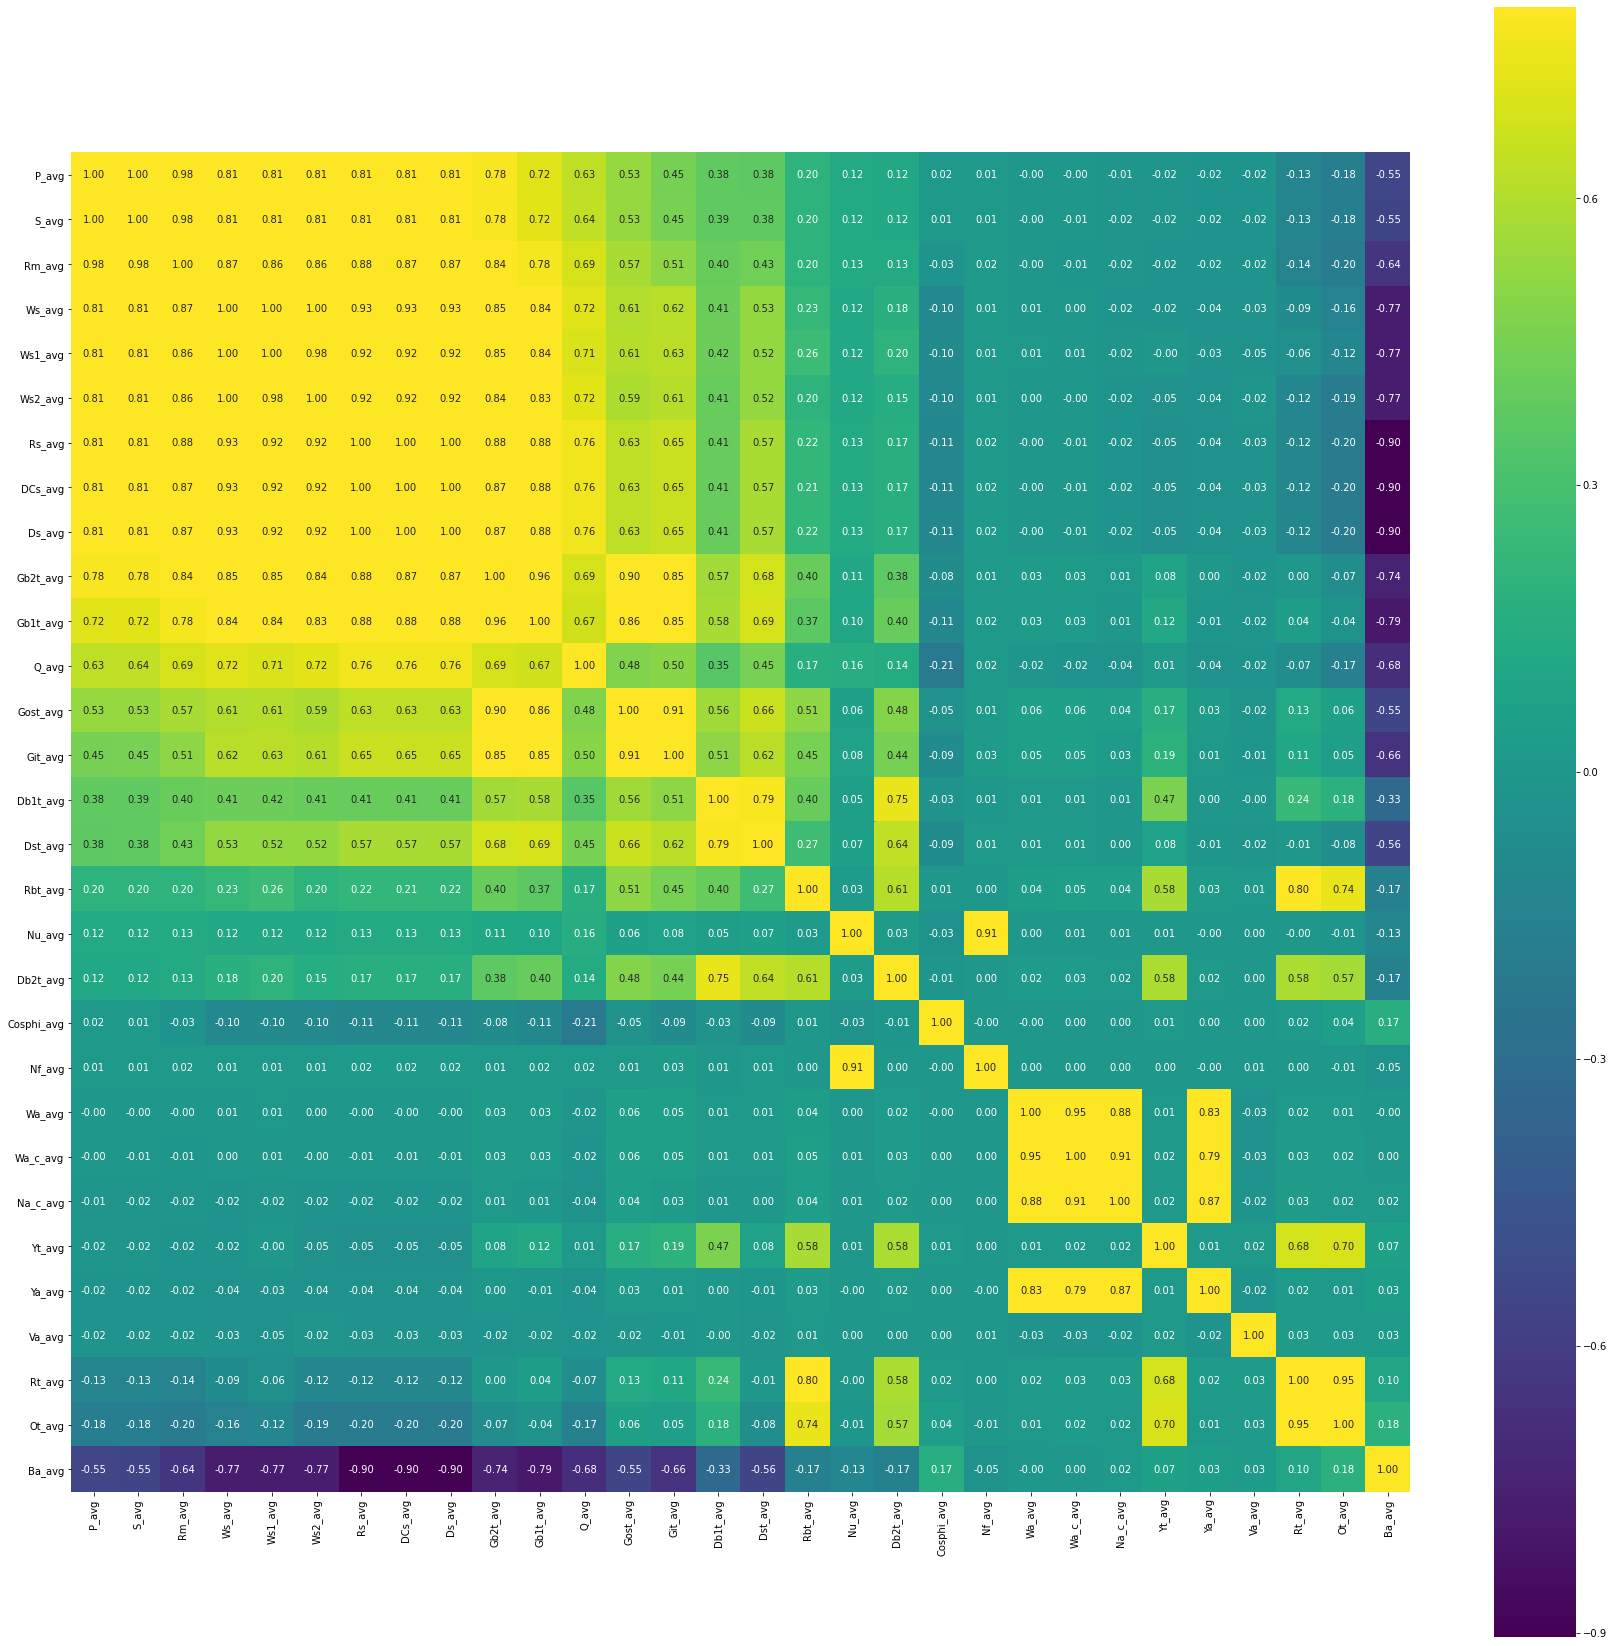

In [58]:
k = 30 #number of variables for heatmap
plt.subplots(figsize=(30, 30))
corrmat= df_avg.corr()
cols = (corrmat.nlargest(k, 'P_avg')['P_avg']).index
cm = np.corrcoef(df_avg[cols].values.T)
# sns.set(font_scale=1.25)
sns.heatmap(cm, cbar=True,  vmax=.8,annot=True, square=True, fmt='.2f', annot_kws={'size': 10},\
            yticklabels=cols.values, xticklabels=cols.values,cmap='viridis',linecolor="white")

Using this correlation matrix, I am able to visualise the raw highly influencing factors on "P_avg"(Active Power). I am looking for these because I will point out features the highly correlating features, in an attempt to capture the complex non-linear relationships within the data.

This is too huge. We need to narrow it down. Let's make a zoomed style heatmap for our 'P_avg' by picking up the 11 variable with which our 'P_avg' has the strongest correlation.

#### Let us visualize the matrix correlation of the features higthly correlated with "P_avg" (Active Power)

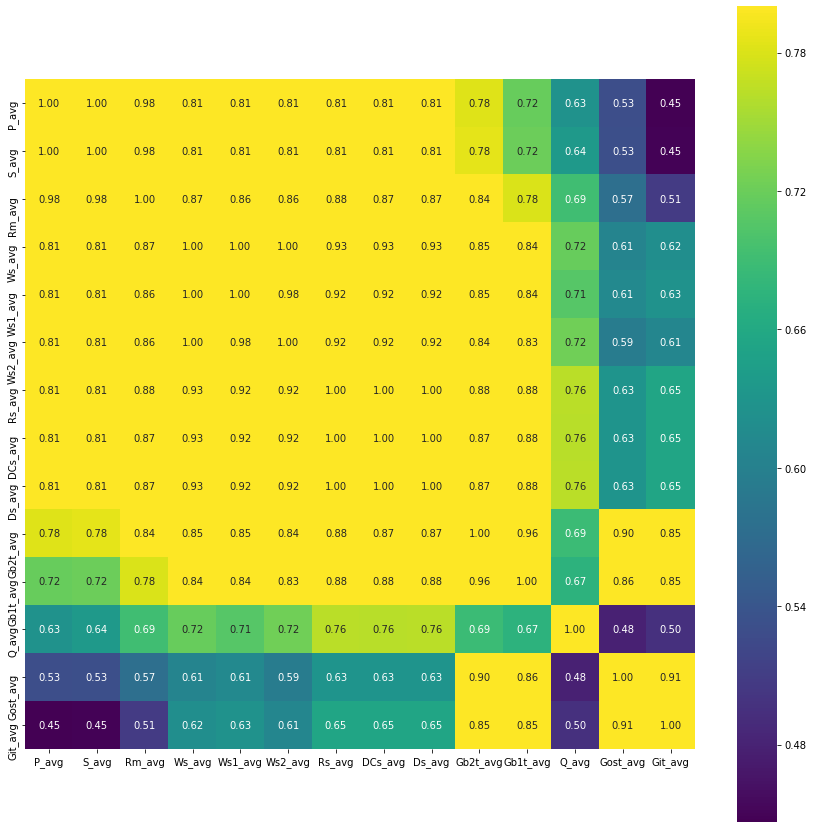

In [59]:
k = 14 #number of variables for heatmap
plt.subplots(figsize=(15, 15))
cols = (corrmat.nlargest(k, 'P_avg')['P_avg']).index
cm = np.corrcoef(df_avg[cols].values.T)
# sns.set(font_scale=1.25)
sns.heatmap(cm, cbar=True,  vmax=.8,annot=True, square=True, fmt='.2f', annot_kws={'size': 10},\
            yticklabels=cols.values, xticklabels=cols.values,cmap='viridis',linecolor="white")

In [60]:
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features']
most_corr

Most Correlated Features
0                     P_avg
1                     S_avg
2                    Rm_avg
3                    Ws_avg
4                   Ws1_avg
5                   Ws2_avg
6                    Rs_avg
7                   DCs_avg
8                    Ds_avg
9                  Gb2t_avg
10                 Gb1t_avg
11                    Q_avg
12                 Gost_avg
13                  Git_avg

Feature selection   
    - P describe data as "Active power"
    - S describe data as "Apparent power"
    - Rm describe data as "Torque"	
    - Ws describe data as "Wind speed"	
    - Ws1 describe data as "Wind speed 1"	
    - Ws2 describe data as "Wind speed 2"
    - Q describe data as "Reactive power"
    - Rs describe data as "Rotor speed"
    - Ds describe data as "Generator speed"
    - DCs describe data as "Generator converter speed"
    - Gb1t describe data as "Gearbox bearing 1 temperature"
    - Gb2t describe data as "Gearbox bearing 2 temperature"	
    - Gost describe data as "Generator oil sump temperature"
    - Git describe data as "Gearbox inlet temperature"

We can notice the presence of outliers in reactive power feature distribution. Furthermore there is a large gap between the distribution of minimum feature and maximum feature. This makes reasonable to choice of the use of feature average. And the standard deviation is varied around 10 percent of the maximum size in various cases.

In [61]:
# Let us proceed to the restriction of our data the useful ones.
df_wind = df[["Wind_turbine_name", "Date_time", "Rs_avg","Gost_avg", "Git_avg", "Ws_avg","Ws1_avg", "Ws2_avg", "Gb2t_avg", "Gb1t_avg", "Ds_avg", "P_avg", "S_avg", "Q_avg", "DCs_avg"]]

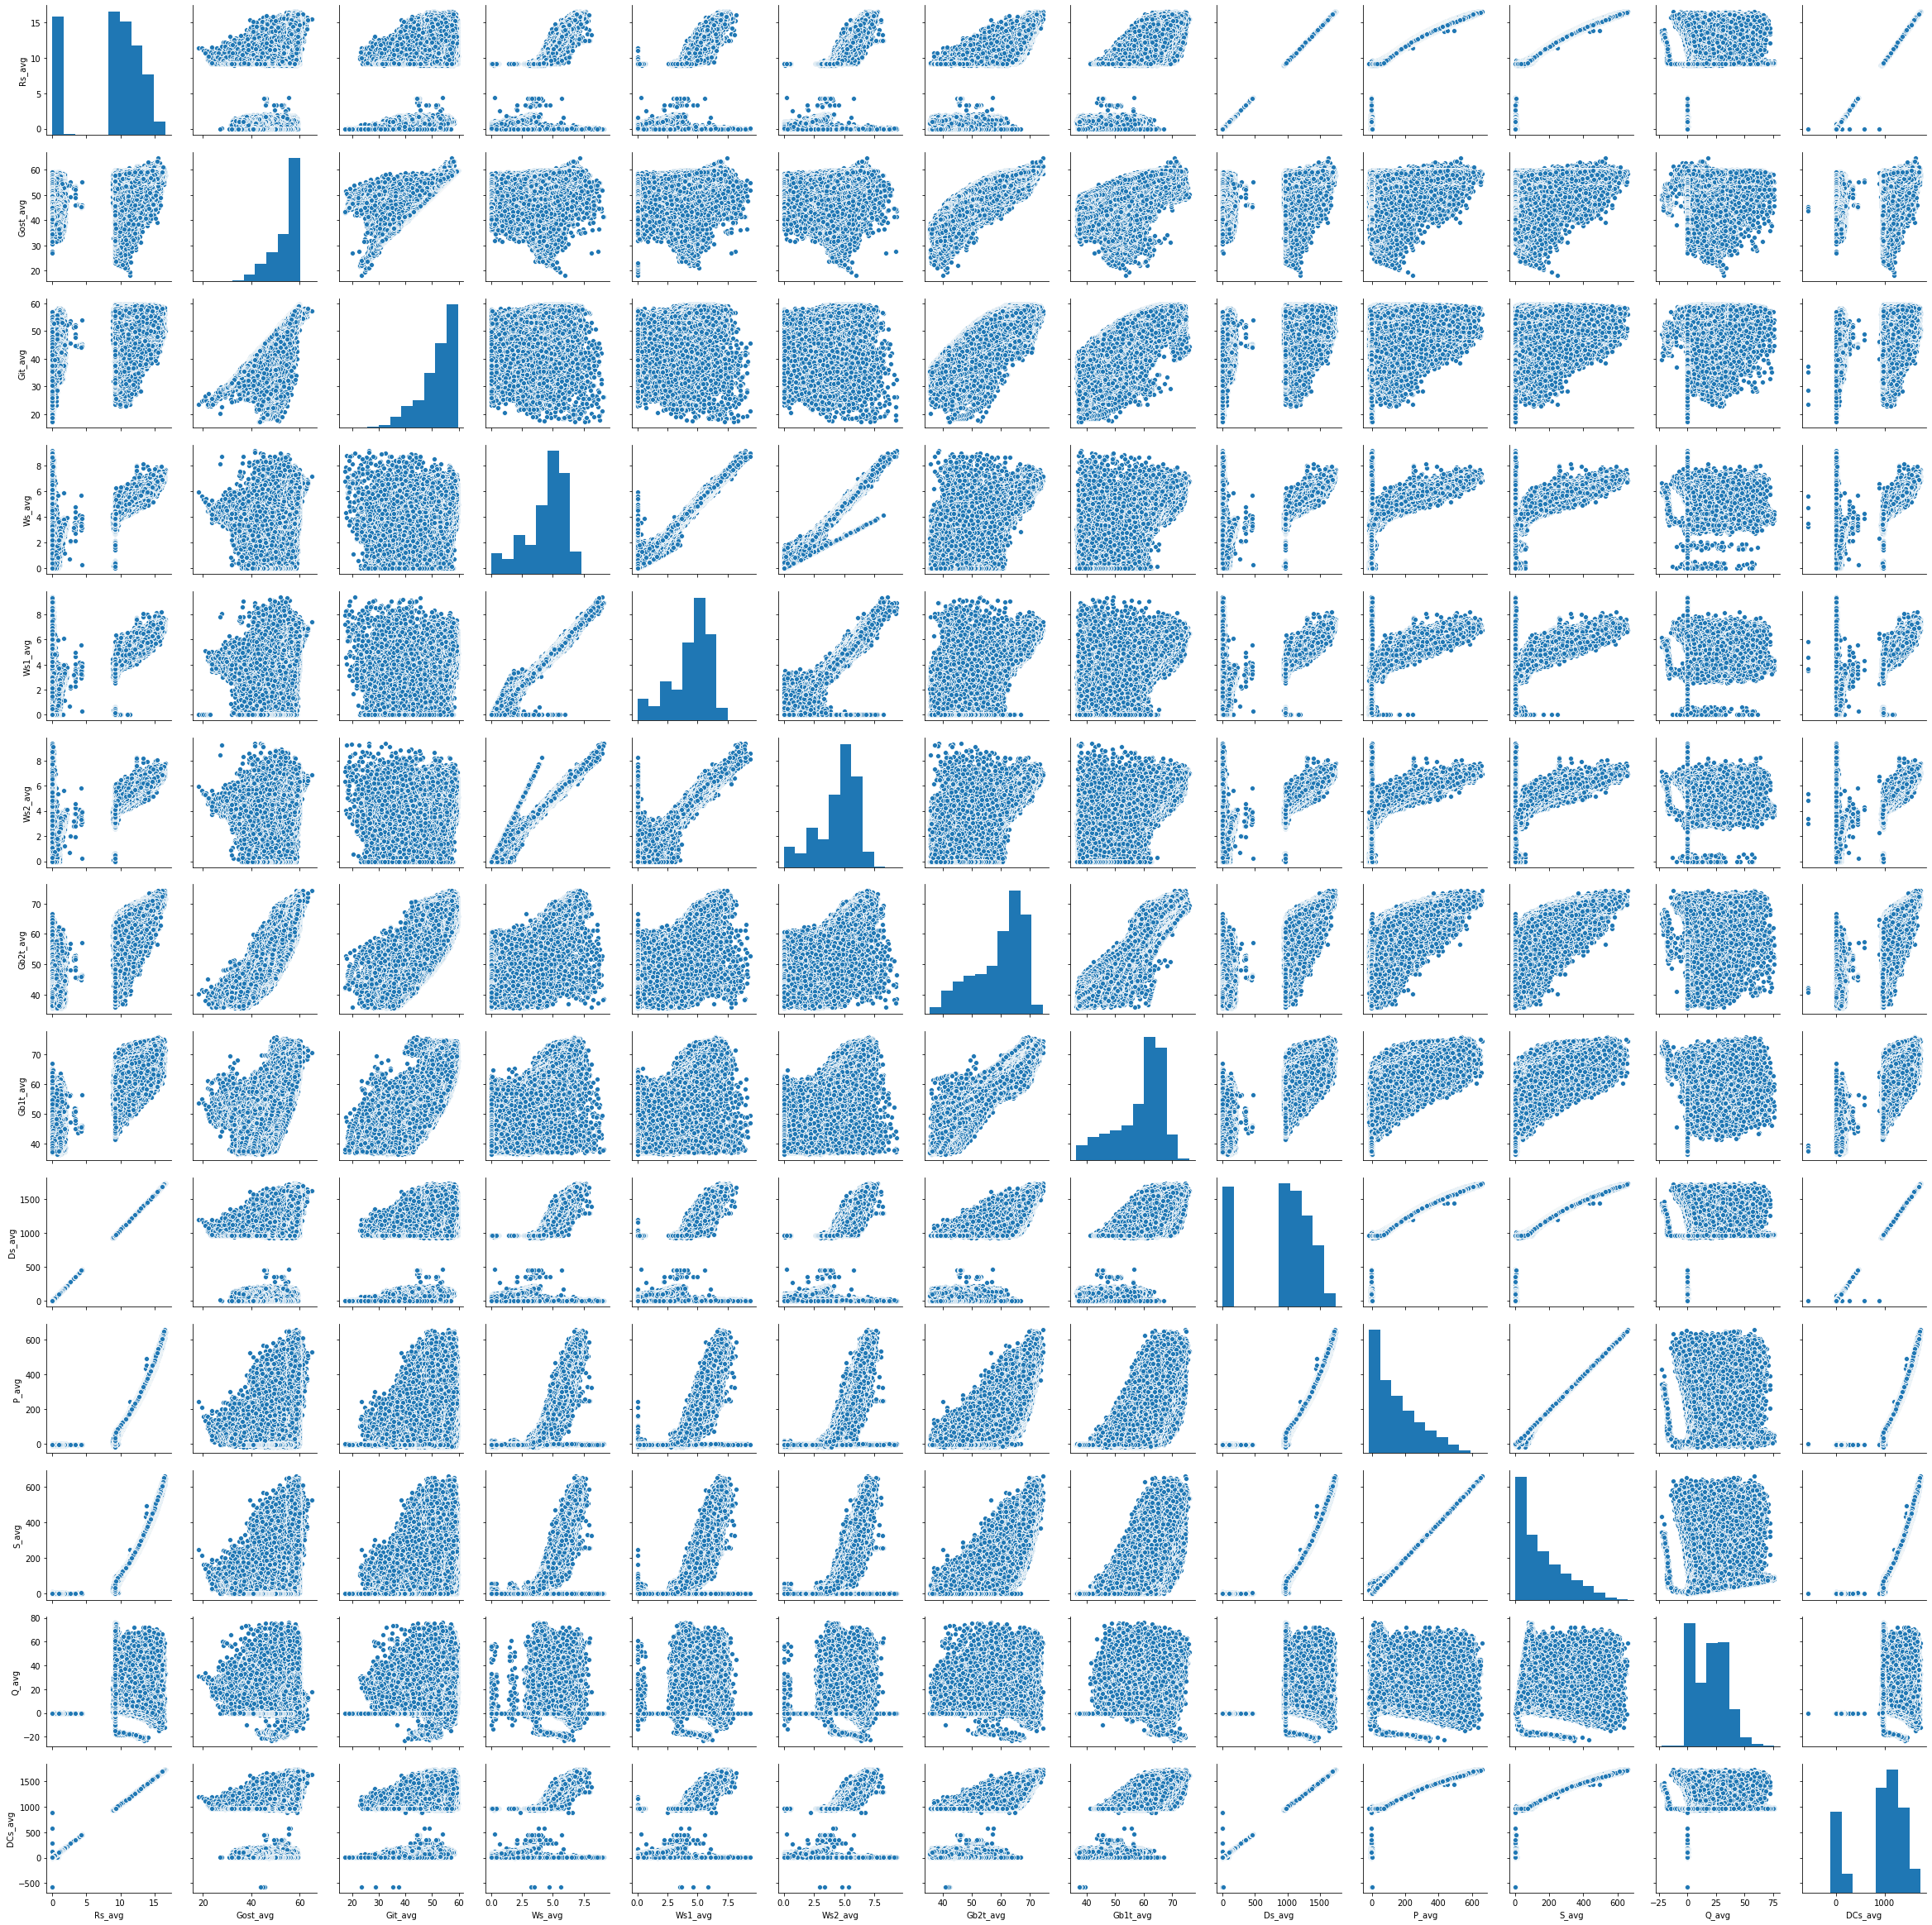

In [76]:
# Let's proceed to the scatter plots. 
sns.pairplot(df_wind)

Having a close done of the feature selection, we can now each feature to see what to adopt as far as the maximum, the minimum and the average of each feature concern. 

/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/seaborn/relational.py:792: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  x, y = np.asarray(x), np.asarray(y)


Text(0.5, 1.0, 'Evolution of Active power with time')

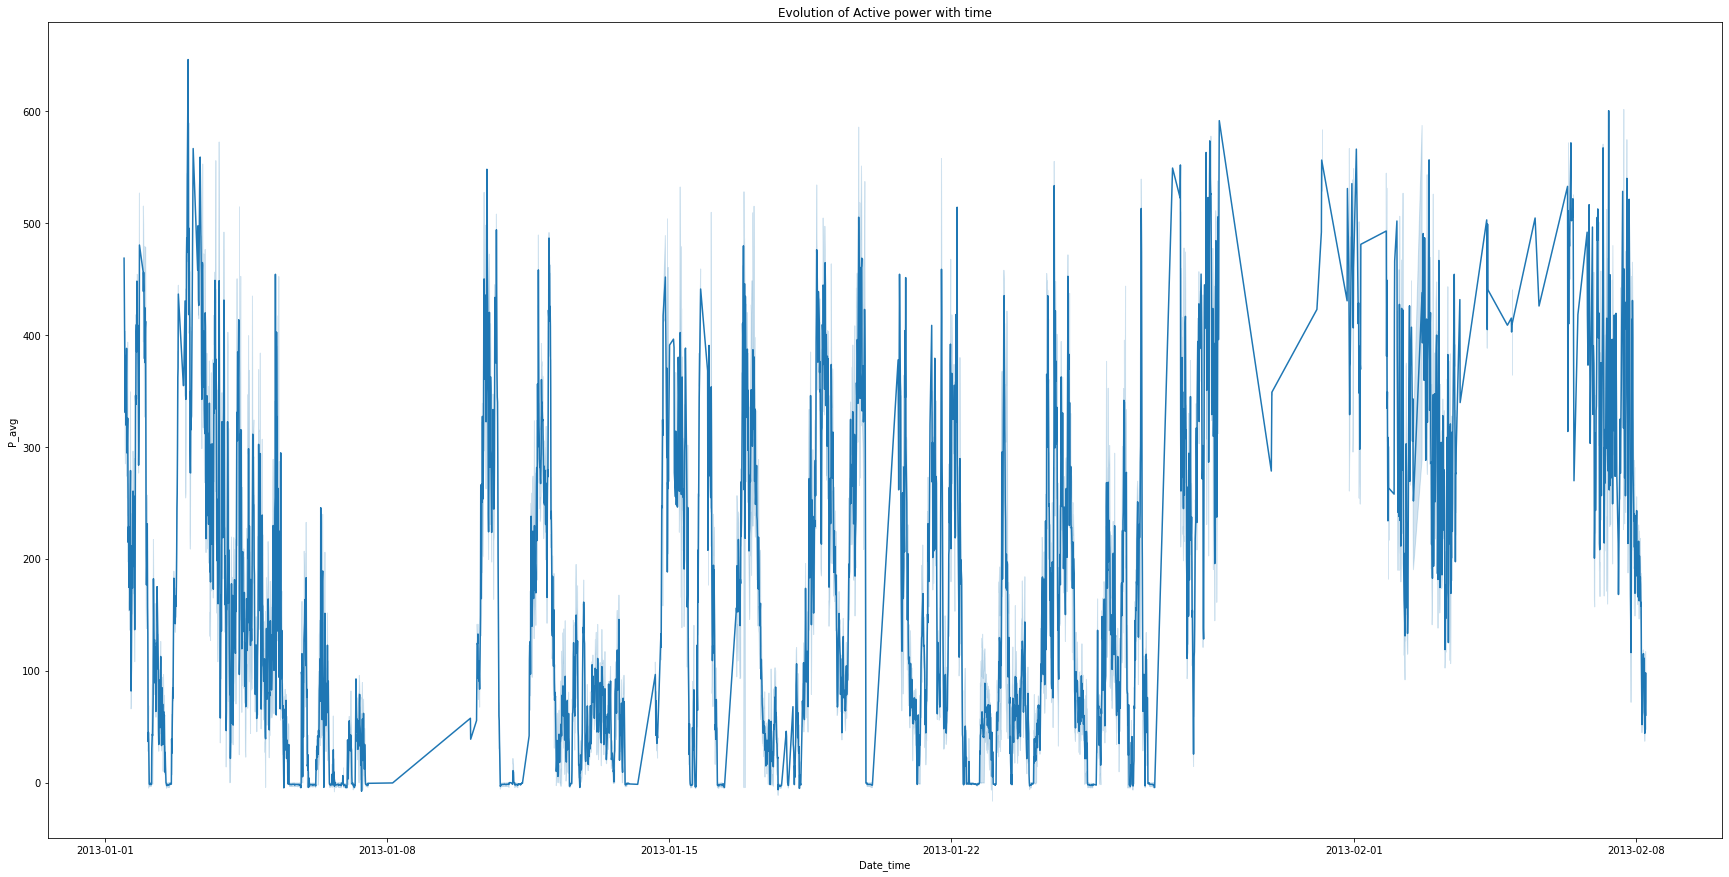

In [62]:
fig, ax = plt.subplots(figsize =(30,15)) 
df_wind.sort_values('Date_time', ascending=True, inplace = True)
sns.lineplot(x ='Date_time', y='P_avg', data=df_wind.iloc[0:10000,:])
plt.title("Evolution of Active power with time")

Because we are investigating power output, the active power feature is given by the following features in  the dataset: `P_avg, P_min, P_max, P_std`. Decide on which active power feature to use (hint: perhaps the average or maximum would be a good place to start). Begin by using the function `groupby` to determine how many turbines there are in the dataset. The dataset is huge, so in order to visualize trends in power output, a simpler way would be to look at monthly trends in the data.

In [63]:
df1= df_wind.groupby("Wind_turbine_name").sum()

In [64]:
df1

Rs_avg      Gost_avg       Git_avg         Ws_avg  \
Wind_turbine_name                                                            
R80711             9.797244e+05  5.883402e+06  5.628214e+06  492697.980090   
R80721             1.030742e+06  6.333298e+06  6.091174e+06  517587.900098   
R80736             9.980789e+05  6.153336e+06  5.899931e+06  500256.120173   
R80790             8.264286e+05  4.936992e+06  4.727790e+06  406298.790089   

                         Ws1_avg        Ws2_avg      Gb2t_avg      Gb1t_avg  \
Wind_turbine_name                                                             
R80711             493655.190108  491737.330065  6.475064e+06  6.454766e+06   
R80721             511172.480155  523994.820135  6.985611e+06  7.062102e+06   
R80736             495288.090064  505218.100137  6.781124e+06  6.678110e+06   
R80790             405722.180178  406831.660083  5.447050e+06  5.238422e+06   

                         Ds_avg         P_avg         S_avg         Q_avg  \
Wind_turbine_name                                                           
R80711             1.028824e+08  1.639200e+07  1.659188e+07  1.337412e+06   
R80721             1.082563e+08  1.624037e+07  1.667531e+07  2.558709e+06   
R80736             1.048281e+08  1.576173e+07  1.607569e+07  2.293061e+06   
R80790             8.678718e+07  1.330109e+07  1.364911e+07  1.985393e+06   

                        DCs_avg  
Wind_turbine_name                
R80711             1.030362e+08  
R80721             1.080161e+08  
R80736             1.051839e+08  
R80790             8.634932e+07

In [65]:
# Let us count the number of turbine in the dataset:
print("The number of of different turbines in the dataset is: " + str(df1.shape[0]))
# The number of turbine in each quality in the dataset is:
number_turbine = df_wind.groupby("Wind_turbine_name")["Wind_turbine_name"].count()
print("The number of turbines in different quality in the dataset is: " + str(number_turbine))

The number of of different turbines in the dataset is: 4
The number of turbines in different quality in the dataset is: Wind_turbine_name
R80711    108220
R80721    117172
R80736    114843
R80790     91411
Name: Wind_turbine_name, dtype: int64


The dataset is huge, so in order to visualize trends in power output, a simpler way would be to look at monthly trends in the data.

In [66]:
# Taking out the columns needed for data processing 
df_months = df_wind.loc[:,["Wind_turbine_name", "Date_time", "P_avg", "Q_avg", "S_avg",'P_std']]

/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [67]:
# grouping into months
import datetime
df_months['Date_time']=df_months["Date_time"].apply(lambda df_months:datetime.datetime(year=df_months.year, month=df_months.month, day=df_months.day))
df_months.set_index(df_months["Date_time"], inplace=True) #Using the date column as index

In [68]:
# Group into months and summing up the consumption values
data_ts = df_months.resample("M").sum()

In [69]:
data_ts

P_avg          Q_avg         S_avg  P_std
Date_time                                                   
2013-01-31  1.267167e+06  195462.409977  1.302823e+06    0.0
2013-02-28  1.211408e+06  160404.350005  1.233973e+06    0.0
2013-03-31  1.541643e+06  208712.019978  1.573643e+06    0.0
2013-04-30  9.378008e+05  152310.929924  9.621813e+05    0.0
2013-05-31  1.045767e+06  182177.380047  1.073908e+06    0.0
2013-06-30  7.912902e+05  156555.790049  8.189780e+05    0.0
2013-07-31  1.020096e+06  180217.020001  1.049404e+06    0.0
2013-08-31  9.143718e+05  180756.790139  9.487821e+05    0.0
2013-09-30  1.040213e+06  199891.889949  1.073583e+06    0.0
2013-10-31  1.119480e+06  190589.700031  1.147391e+06    0.0
2013-11-30  7.489600e+05  120066.190043  7.662202e+05    0.0
2013-12-31  1.251806e+06  180197.749976  1.275292e+06    0.0
2014-01-31  1.446881e+06  183913.049953  1.471623e+06    0.0
2014-02-28  1.149092e+06  137380.019942  1.164557e+06    0.0
2014-03-31  1.348812e+06  194835.360113  1.382283e+06    0.0
2014-04-30  1.292818e+06  193400.690058  1.326750e+06    0.0
2014-05-31  1.284976e+06  179989.169976  1.309779e+06    0.0
2014-06-30  1.329937e+06  201447.109905  1.362954e+06    0.0
2014-07-31  1.575777e+06  229459.319944  1.613561e+06    0.0
2014-08-31  1.420283e+06  208240.320051  1.454472e+06    0.0
2014-09-30  1.642769e+06  248062.979975  1.683113e+06    0.0
2014-10-31  1.196451e+06  168003.889973  1.225015e+06    0.0
2014-11-30  1.684729e+06  253466.239945  1.722005e+06    0.0
2014-12-31  1.174886e+06  153601.449931  1.198398e+06    0.0
2015-01-31  1.100367e+06  151114.230087  1.121576e+06    0.0
2015-02-28  9.835913e+05  142267.419992  1.005636e+06    0.0
2015-03-31  1.309594e+06  169998.690044  1.335550e+06    0.0
2015-04-30  1.332369e+06  185294.409924  1.362588e+06    0.0
2015-05-31  1.257928e+06  172682.249917  1.285318e+06    0.0
2015-06-30  1.123815e+06  170876.280052  1.155495e+06    0.0
2015-07-31  1.415535e+06  200468.890024  1.446247e+06    0.0
2015-08-31  1.434264e+06  179712.509947  1.466323e+06    0.0
2015-09-30  1.315899e+06   90847.370030  1.327397e+06    0.0
2015-10-31  1.602565e+06  108550.570006  1.622170e+06    0.0
2015-11-30  1.145149e+06   77444.509999  1.157822e+06    0.0
2015-12-31  1.653977e+06  108292.380055  1.665561e+06    0.0
2016-01-31  1.276239e+06  120183.059970  1.290892e+06    0.0
2016-02-29  9.936596e+05  122437.609972  1.009996e+06    0.0
2016-03-31  1.402089e+06  167884.600055  1.424147e+06    0.0
2016-04-30  1.287568e+06  170604.549910  1.316514e+06    0.0
2016-05-31  1.403988e+06  186002.179981  1.436266e+06    0.0
2016-06-30  1.459226e+06  173546.809987  1.488494e+06    0.0
2016-07-31  1.240798e+06  121801.349971  1.267964e+06    0.0
2016-08-31  1.424780e+06  141132.340045  1.451446e+06    0.0
2016-09-30  1.359172e+06  139319.170000  1.386116e+06    0.0
2016-10-31  1.885325e+06  240372.810057  1.918302e+06    0.0
2016-11-30  1.315907e+06  170700.020009  1.341525e+06    0.0
2016-12-31  1.533973e+06  203898.860041  1.567956e+06    0.0

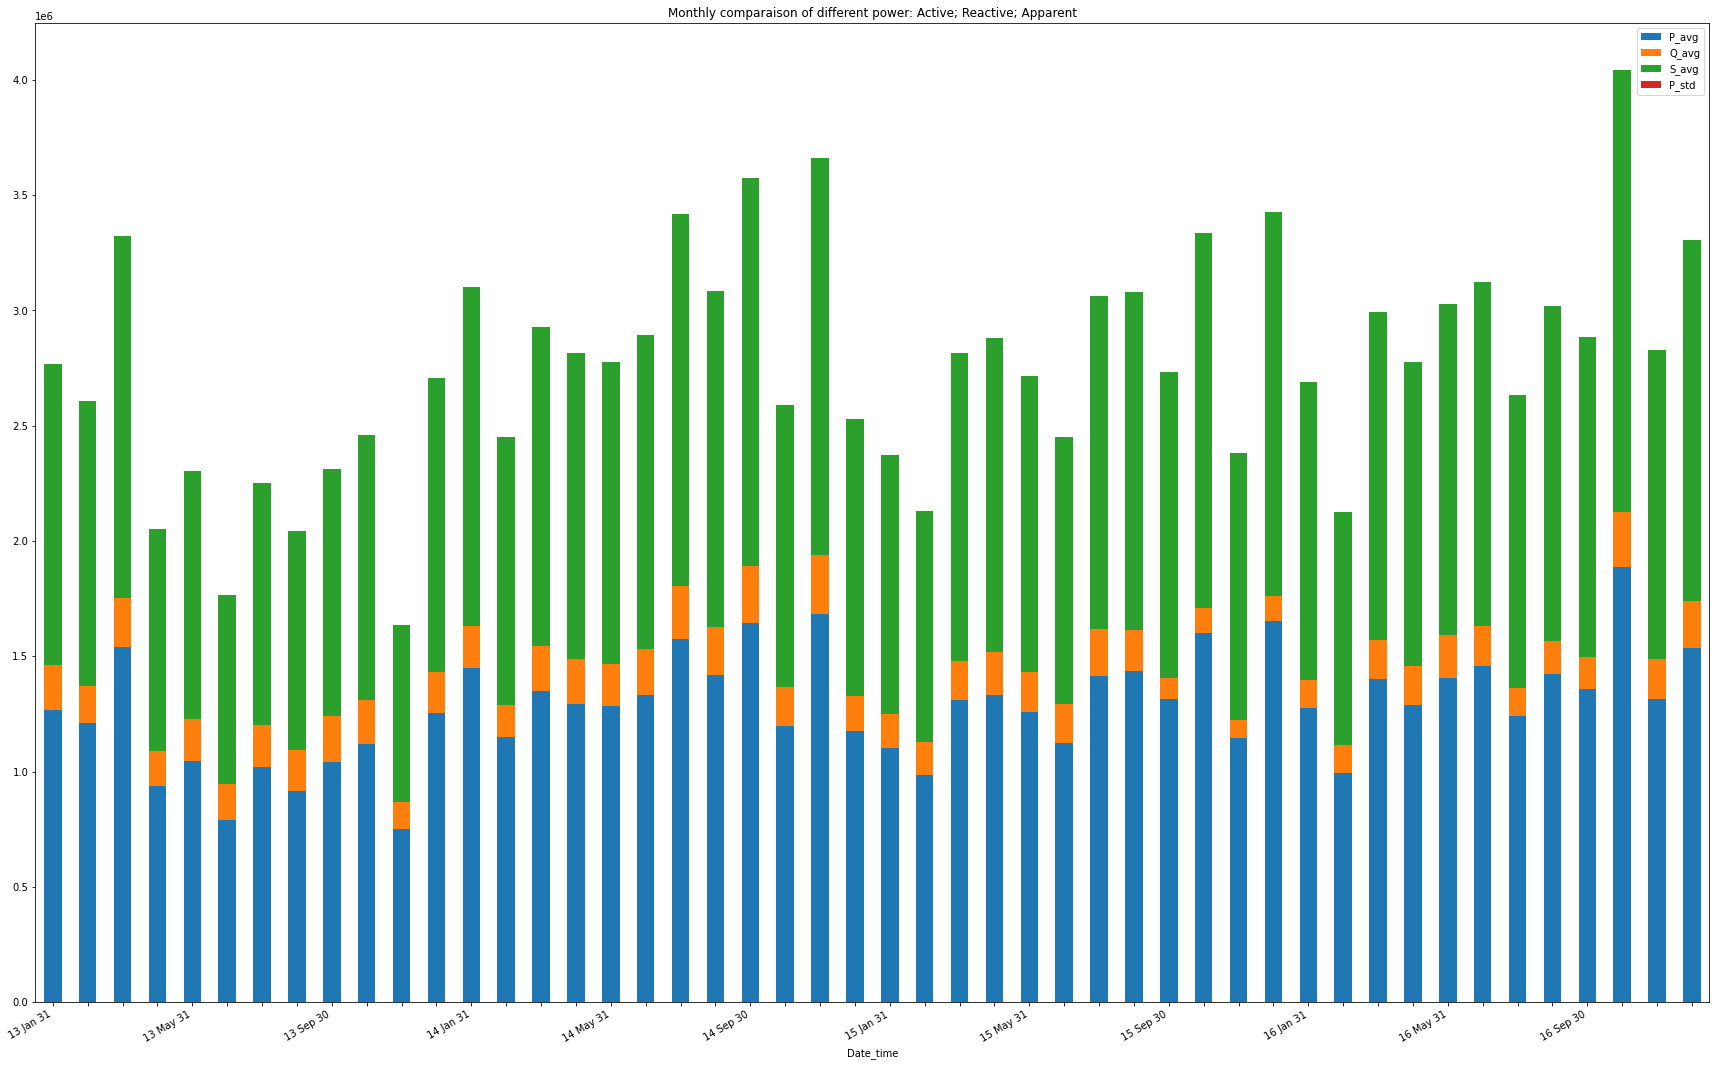

In [77]:
import matplotlib.ticker as ticker
ax = data_ts.plot(kind="bar", stacked=True, figsize=(30,20))# kind="bar", x=data_ts.index, stacked=True)

# Make most of the ticklabels empty so the labels don't get too crowded
ticklabels = ['']*len(data_ts.index)

# Every 4th tick lable shows the month and day
#ticklabels[::4] = [item.strftime('%b %d') for item in data_ts.index[::4]]

# Every 12th ticklable includes the year
#ticklables = [item for item in data_ts.index]
ticklabels[::4] = [item.strftime('%y %b %d') for item in data_ts.index[::4]]


ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
plt.gcf().autofmt_xdate()
plt.title("Monthly comparaison of different power: Active; Reactive; Apparent")

plt.show()

Let us visualise the monthly trends of power output(Active power: P_avg), Q_avg(Reactive power), and S_avg(Apparent power). 

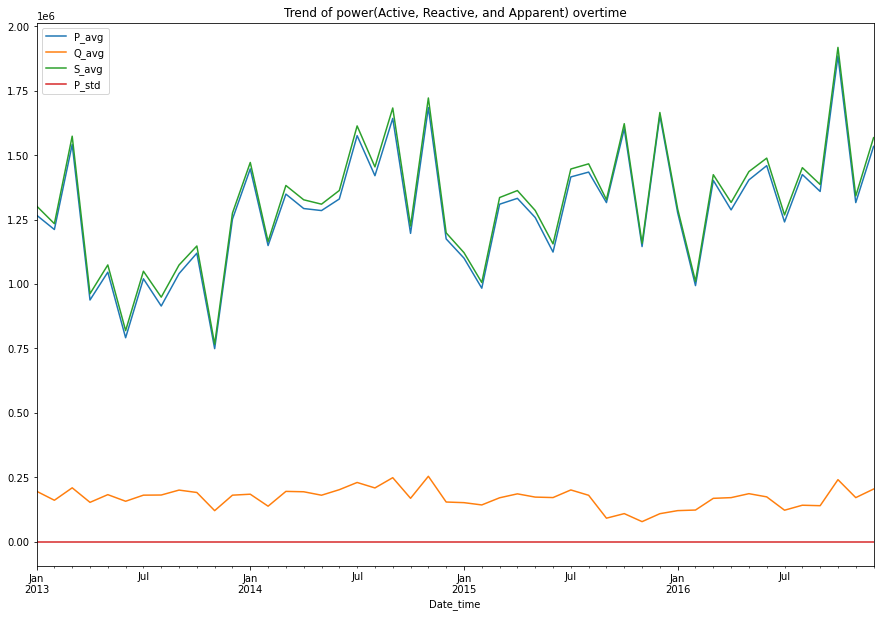

In [78]:
# Let us visualise the trends in power output(Active power: P_avg), Q_avg(Reactive power), and S_avg(Apparent power) 
data_ts.plot(figsize=[15,10])
plt.title("Trend of power(Active, Reactive, and Apparent) overtime")
plt.show()

There is a wind turbine with `Wind_turbine_name` R80711. Use this column and determine the trend for the month of January.

In [72]:
df_R80711= df_wind.groupby("Wind_turbine_name").get_group('R80711')
df_R80711

Wind_turbine_name                  Date_time  Rs_avg   Gost_avg  \
224788            R80711  2013-01-01 13:10:00+01:00   14.36  56.959999   
659722            R80711  2013-01-01 13:30:00+01:00   14.03  58.720001   
224791            R80711  2013-01-01 14:20:00+01:00   14.30  57.349998   
324390            R80711  2013-01-01 14:30:00+01:00   14.55  57.950001   
456059            R80711  2013-01-01 14:40:00+01:00   12.67  58.330002   
...                  ...                        ...     ...        ...   
400359            R80711  2016-12-30 13:10:00+01:00    0.80  42.130001   
29310             R80711  2016-12-30 13:20:00+01:00    0.36  41.630001   
159844            R80711  2016-12-30 13:30:00+01:00    0.07  41.410000   
560395            R80711  2016-12-30 13:40:00+01:00    0.00  41.290001   
248043            R80711  2016-12-30 13:50:00+01:00    0.03  40.369999   

          Git_avg  Ws_avg  Ws1_avg  Ws2_avg   Gb2t_avg   Gb1t_avg  \
224788  55.650002    6.59     6.42     6.75  67.580002  65.389999   
659722  57.330002    6.46     6.27     6.66  69.550003  67.610001   
224791  56.009998    6.55     6.42     6.67  67.910004  64.980003   
324390  56.230000    6.46     6.44     6.47  68.599998  66.029999   
456059  56.959999    5.79     5.66     5.91  67.739998  65.940002   
...           ...     ...      ...      ...        ...        ...   
400359  39.470001    0.83     0.73     0.94  42.799999  43.290001   
29310   37.650002    0.39     0.00     0.79  41.570000  41.520000   
159844  31.480000    0.22     0.00     0.45  40.849998  39.980000   
560395  25.809999    0.00     0.00     0.00  40.020000  38.770000   
248043  35.009998    0.00     0.00     0.00  39.139999  37.470001   

             Ds_avg      P_avg      S_avg      Q_avg      DCs_avg  
224788  1505.770000  418.01999  418.62000  19.770000  1506.939900  
659722  1471.290000  385.51001  386.45001  22.850000  1472.490000  
224791  1500.280000  413.94000  414.48001  18.280001  1501.430100  
324390  1525.970000  434.98001  435.48001  18.580000  1527.110000  
456059  1329.300000  268.22000  269.41000  24.420000  1330.610000  
...             ...        ...        ...        ...          ...  
400359    84.160004   -3.60000    3.60000   0.000000    86.080002  
29310     39.639999   -1.87000    1.87000   0.000000    41.560001  
159844     9.990000   -1.24000    1.24000   0.000000    12.620000  
560395     0.000000   -1.83000    1.83000   0.000000     2.830000  
248043     4.870000   -0.83000    0.83000   0.000000     8.050000  

[108220 rows x 15 columns]

Text(0.5, 1.0, 'Trend of the month of January 2016')

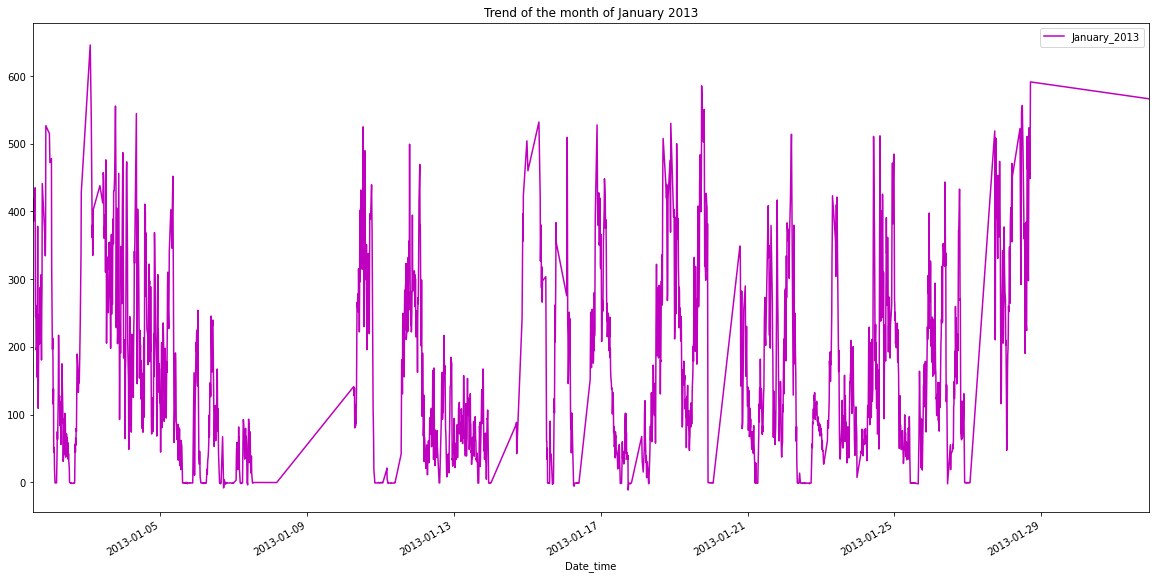

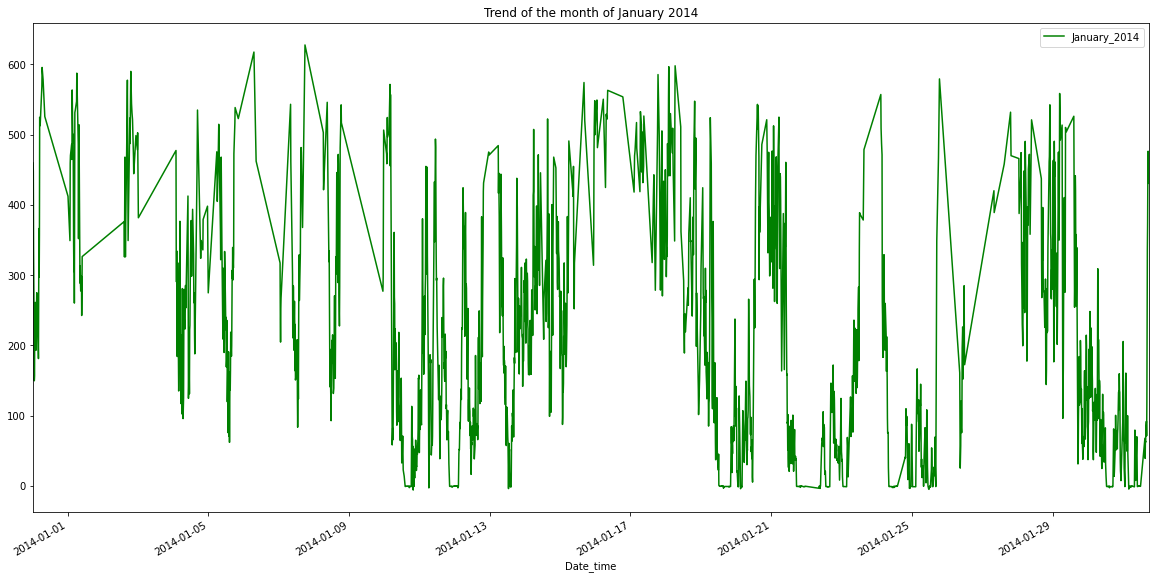

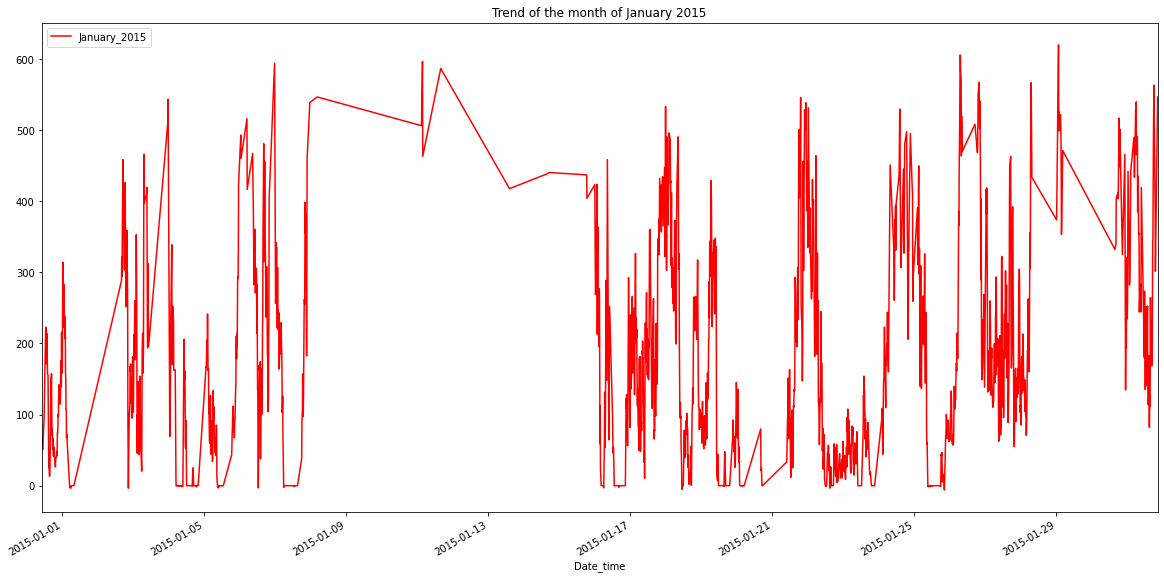

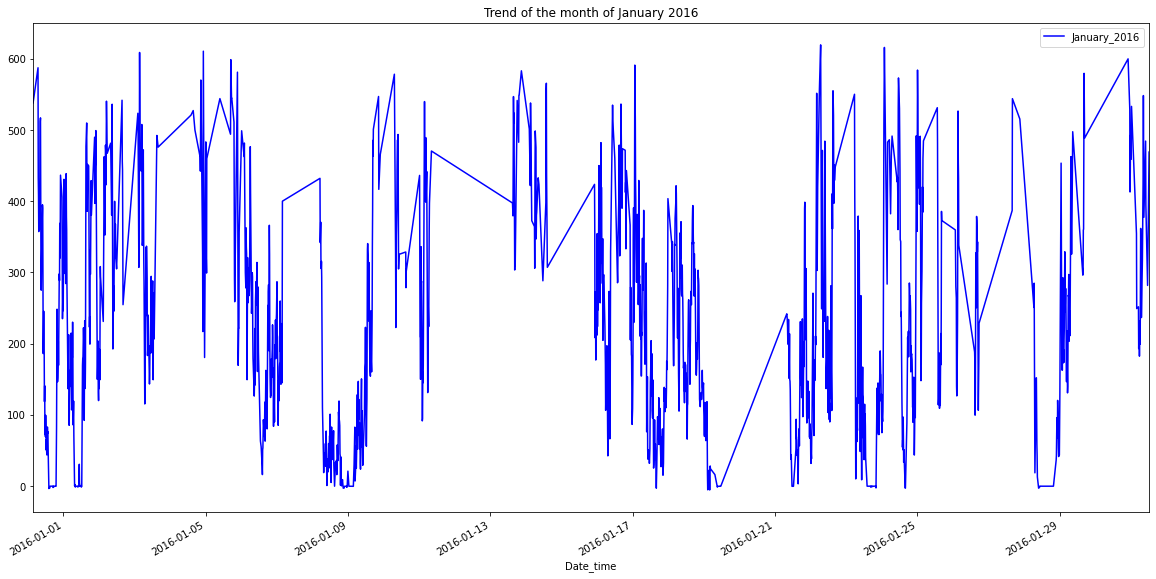

In [173]:
#Visualize the power output(Power average)trend for a month for Turbine(R80711)
#Call out all the rows that is between January 1, 2014 to May 1, 2014 and plot the Power average
df_R80711.loc[(pd.to_datetime('2012-12-31 00:00:00+01:00')<df_R80711['Date_time']) & (df_R80711['Date_time']<pd.to_datetime('2013-02-01 00:00:00+01:00'))].plot(x='Date_time', y='P_avg',color ='m', label ='January_2013',figsize=(20,10)).set_title("Trend of the month of January 2013")
df_R80711.loc[(pd.to_datetime('2013-12-31 00:00:00+01:00')<df_R80711['Date_time']) & (df_R80711['Date_time']<pd.to_datetime('2014-02-01 00:00:00+01:00'))].plot(x='Date_time', y='P_avg',color ='g', label ='January_2014', figsize=(20,10)).set_title("Trend of the month of January 2014")
df_R80711.loc[(pd.to_datetime('2014-12-31 00:00:00+01:00')<df_R80711['Date_time']) & (df_R80711['Date_time']<pd.to_datetime('2015-02-01 00:00:00+01:00'))].plot(x='Date_time', y='P_avg',color ='r', label ='January_2015', figsize=(20,10)).set_title("Trend of the month of January 2015")
df_R80711.loc[(pd.to_datetime('2015-12-31 00:00:00+01:00')<df_R80711['Date_time']) & (df_R80711['Date_time']<pd.to_datetime('2016-02-01 00:00:00+01:00'))].plot(x='Date_time', y='P_avg',color ='b', label ='January_2016', figsize=(20,10)).set_title("Trend of the month of January 2016")

Visualize the power output (Power average) trend for a month.

Text(0.5, 1.0, 'Trend of the months of April and May 2014')

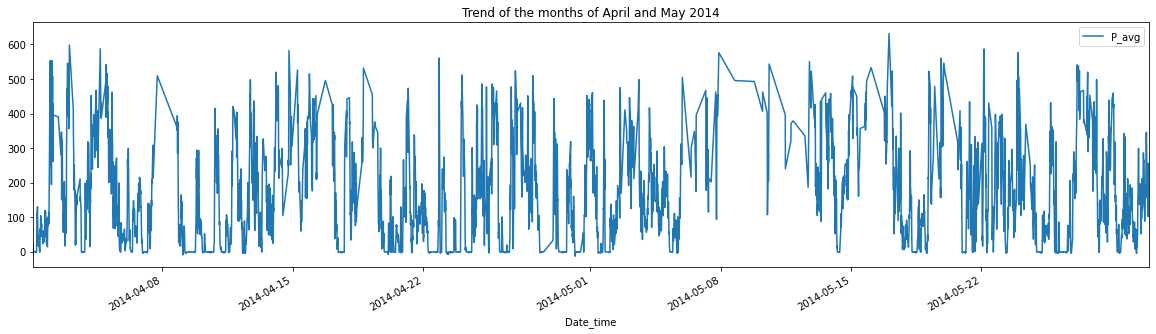

In [178]:
#Call out all the rows that is between April 1, 2014 & May 1, 2014 and plot the Power average
df_R80711.loc[(pd.to_datetime('2014-04-01 00:00:00+01:00')<df_R80711['Date_time']) & (df_R80711['Date_time']<pd.to_datetime('2014-05-31 00:00:00+01:00'))].plot(x='Date_time', y='P_avg', figsize=(20, 5)).set_title("Trend of the months of April and May 2014")

### Split dataset into predictor and target matrices

In [80]:
# Values of target
y = df_wind['P_avg'].values

# Values of attributes
df_wind = df_wind.drop(['P_avg', 'Date_time', 'Wind_turbine_name'], axis=1)
X = df_wind.values

In [81]:
# Scaling the data. 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data - Remember, from this point until the model is trained, we can't make 
# any decisions, including scaling factor, based on the test data.
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [82]:
# Now apply the transformations to the data:
X = scaler.transform(X) 

In [83]:
X

array([[ 1.24745166,  0.75983007,  0.87732329, ...,  2.38273124,
         2.79148114,  1.24045053],
       [ 0.87376718,  0.31123444, -0.2172592 , ...,  1.1878851 ,
         1.35116242,  0.88151861],
       [ 1.0031998 ,  0.37559015,  0.34552886, ...,  1.54614943,
         1.67784697,  1.00026554],
       ...,
       [ 0.07211994, -4.26557857, -3.39660359, ..., -0.8932855 ,
        -0.75221494,  0.08113475],
       [ 0.07211994, -4.20500829, -3.34277169, ..., -0.79693637,
        -0.30440801,  0.08111479],
       [ 0.09090859, -3.24346114, -2.65763856, ..., -0.54005393,
        -0.163906  ,  0.08097521]])

In [84]:
y

array([468.5     , 306.13    , 355.09    , ...,  21.76    ,  33.450001,
        69.889999])

### Dimension Reduction with PCA

The dataset we have it quite huge. We need to select features to use for our analysis of the active power. To discover the principal features, we can principal component analysis. First split the data into predictor and target variables. PCA allows you to reduce the number of you predictors, and to decorrelate them especially for features that have a direct relationship like apparent power, reactive power and active power.

#### Feature choosing

##### Using Lasso to degenerate the parameters

In [85]:
from sklearn.linear_model      import SGDRegressor
sgd_l2 = SGDRegressor(max_iter=30, penalty="l2", random_state=1,alpha=1e-2)
sgd_l2.fit(X, y)

SGDRegressor(alpha=0.01, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=30,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=1,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [86]:
sgd_l2.coef_

array([ 1.21420062e-01, -2.86281153e+00, -2.82662507e+00,  7.14235657e-01,
        8.57029180e-01,  5.74194391e-01,  1.14882857e+01, -2.12310957e+00,
       -1.71012628e-01,  1.31883150e+02, -2.49884596e+00, -9.31427065e-02])

In [87]:
sgd_l2.coef_.min(), sgd_l2.coef_.max()

(-2.8628115290782414, 131.88314976368073)

In [88]:
good_feats = np.abs(np.array(sgd_l2.coef_)) > 1e+12 # lower bound alpha=1e-6
print("Features reduced from %10d to %10d" % (X.shape[1], int(good_feats.sum())))

Features reduced from         12 to          0


In [89]:
X_xgb_select = X
y_xgb_select = y

##### Using XGBooster to plot importance

In [90]:
from xgboost import XGBRegressor, plot_importance
model = XGBRegressor(objective ='reg:squarederror', max_depth=5,n_estimators=1000,  learning_rate=1e-2)
model.fit(X,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [91]:
model.feature_importances_

array([1.1738139e-05, 2.2874958e-06, 8.2032266e-06, 1.3895154e-03,
       1.3053012e-05, 1.2264088e-04, 1.5581788e-06, 7.0703250e-06,
       1.2003221e-04, 8.9639521e-01, 4.6143893e-04, 1.0146725e-01],
      dtype=float32)

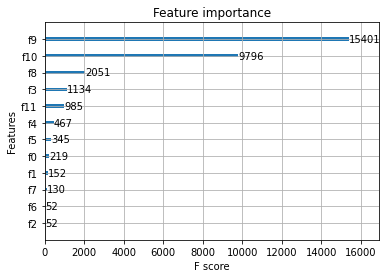

In [92]:
# Visualise these with a barplot
plot_importance(model,max_num_features=25)
plt.show()

In [93]:
good_feats_xgb = np.abs(np.array(model.feature_importances_)) > 1e-2
print("Features reduced from %10d to %10d" % (X.shape[1], int(good_feats_xgb.sum())))

Features reduced from         12 to          2


In [94]:
X_xgb_select =pd.DataFrame(X).loc[:, good_feats_xgb]
X_xgb_select

9         11
0       2.382731  1.240451
1       1.187885  0.881519
2       1.546149  1.000266
3       1.781953  1.078360
4       0.788485  0.730314
...          ...       ...
431641 -0.716998  0.062932
431642 -0.687677  0.063052
431643 -0.893286  0.081135
431644 -0.796936  0.081115
431645 -0.540054  0.080975

[431646 rows x 2 columns]

In [95]:
pd.DataFrame(X_xgb_select).to_csv('train_9feautre.csv',index=False)
pd.DataFrame(y_xgb_select).to_csv('test_9feautre.csv',index=False)

### Plot the variance

#### Using XBoost

In [97]:
# Let us compute the eigenpairs of the Active power covariance matrix:
cov_mat = np.cov(X_xgb_select.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

In [98]:
cov_mat

array([[1.00000232, 0.81067827],
       [0.81067827, 1.00000232]])

In [100]:
# calculate cumulative sum of explained variances
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [101]:
cum_var_exp

array([0.90533819, 1.        ])

In [102]:
np.array(var_exp)

array([0.90533819, 0.09466181])

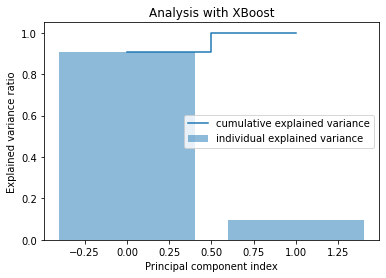

In [104]:
# plot explained variances
pos =np.arange(len(var_exp))
var =np.array(var_exp)
plt.bar(pos, var, alpha=0.5,
        align='center', label='individual explained variance')
plt.step(pos, cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.title("Analysis with XBoost")
plt.show()

##### Using PCA

In [105]:
#  Initialize and fit
pca=PCA(n_components=5)                                    
pca.fit(X)                      

# Evaluate Component
PCA(copy=True, n_components=None, whiten=False)
print('Principal components '+ str(pca.components_))

# Explained Variance Ratio
print("Variance " + str(pca.explained_variance_ratio_))

# Cumulative sum of variance explained with 5 features
variance = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
print("% Cumulative variance " + str(variance))

Principal components [[-0.30902487 -0.24482363 -0.24488072 -0.30429489 -0.30328221 -0.30237994
  -0.30516041 -0.30235795 -0.30899782 -0.26719569 -0.24841013 -0.30897468]
 [ 0.14558175 -0.57036141 -0.55525053  0.18878936  0.1751297   0.20035603
  -0.23229565 -0.22789707  0.1453678   0.23620068  0.18654305  0.14531717]
 [ 0.0248216  -0.03205668  0.07335715 -0.18559926 -0.20328089 -0.16611415
  -0.04030328 -0.01103358  0.0254893  -0.27253885  0.90132484  0.0234772 ]
 [ 0.13002979 -0.21575767  0.22518042  0.2101917   0.20852114  0.20969921
  -0.21971567  0.02211306  0.13186879 -0.80305473 -0.1601754   0.13226066]
 [-0.41446867  0.13492249  0.0419844   0.35691974  0.35527878  0.3558018
  -0.0088774  -0.13904039 -0.41485547 -0.00130516  0.25206615 -0.41591366]]
Variance [0.81489653 0.09469384 0.03447661 0.02546249 0.01713311]
% Cumulative variance [81.5 91.  94.4 96.9 98.6]


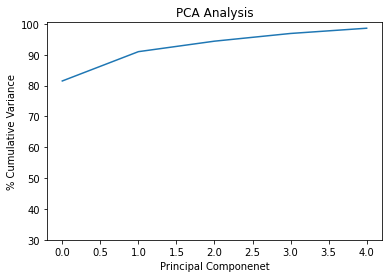

In [106]:
plt.ylabel('% Cumulative Variance')
plt.xlabel('Principal Componenet')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')

plt.plot(variance)

### Random Forest with PCA

Construct a PCA and Random Forest Regressor pipeline. A pipeline is a term for the processing of data until it reaches a form that is usable for the machine learning algorithm. Now there is an actual pipeline module you'll need to use, that streamlines the process of dimension reduction and application of the machine learning algorithm, in this case the random forest regression model. For now, use the first two principal components to construct the pipeline.

In [107]:
# Construct a PCA and Random Forest Regressor pipelines
from sklearn.pipeline import Pipeline
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

regression = RandomForestRegressor()  
pipeline   = Pipeline([('scl', StandardScaler()),
                       ('PCA', PCA(n_components=2)),
                       ('CFL', RandomForestRegressor(max_depth=5, random_state=0))])

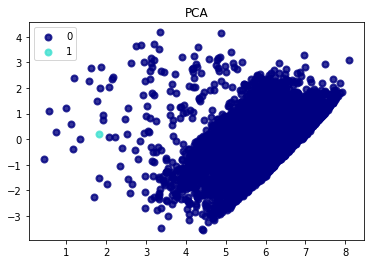

In [108]:
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], [0, 1]):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA')

plt.show()

### Plot the principal components

Select the first two components and display them. As rule of thumb, the first to components are selected as they are easier to display in a 2-dimensions.

In [109]:
#  Initialize and fit
pca=PCA(n_components=2)                                    
pca.fit(X)                      

# Evaluate Component
PCA(copy=True, n_components=None, whiten=False)
print('Principal components '+ str(pca.components_))

# Explained Variance Ratio
print("Variance " + str(pca.explained_variance_ratio_))

# Cumulative sum of variance explained with 2 features
variance = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
print("% Cumulative variance " + str(variance))

Principal components [[-0.30902487 -0.24482363 -0.24488072 -0.30429489 -0.30328221 -0.30237994
  -0.30516041 -0.30235795 -0.30899782 -0.26719569 -0.24841013 -0.30897468]
 [ 0.14558175 -0.57036141 -0.55525053  0.18878936  0.1751297   0.20035603
  -0.23229565 -0.22789707  0.1453678   0.23620068  0.18654305  0.14531717]]
Variance [0.81489653 0.09469384]
% Cumulative variance [81.5 91. ]


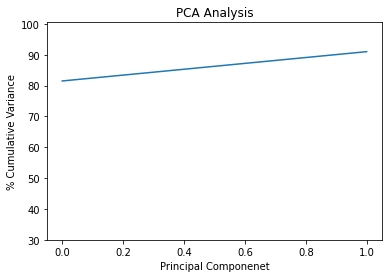

In [110]:
plt.ylabel('% Cumulative Variance')
plt.xlabel('Principal Componenet')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')


plt.plot(variance)

### Split dataset in training and test sets

Split the data into training and test sets and use the pipeline to fit and test the model.

In [111]:
# Let us split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [112]:
# Fit the grid search objects
pipeline.fit(X_train, y_train)

/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
         steps=[('scl',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('PCA',
                 PCA(copy=True, iterated_power='auto', n_components=2,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('CFL',
                 RandomForestRegressor(bootstrap=True, criterion='mse',
                                       max_depth=5, max_features='auto',
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=10, n_jobs=None,
                                       oob_score=False, random_state=0,
                             

In [113]:
y_pred = pipeline.predict(X_test)
y_pred

array([117.1922249 ,  -1.24881008, 217.9653366 , ..., 103.12969768,
       158.43995075,  -1.24881008])

In [114]:
# Score
pipeline.score(X_test, y_test)

0.9608539011975898

### Evaluate the results

Using the `sklearn.metrics` moduel determine the accuracy score, i.e., the coefficient of determination $R^2$ of the prediction.

In [115]:
# r2-score
from sklearn.metrics import r2_score
r2_score(y_test, y_pred, multioutput='uniform_average')

0.96085390119759

In [116]:
# Normalized (%)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)

Normalized confusion matrix
[[0.09142367 0.09139844 0.08998221 0.0742449  0.07390774 0.07386341
  0.07384329 0.07378239 0.07377884 0.0715904  0.0656056  0.05735077
  0.04840589 0.04082243]
 [0.09110841 0.09113356 0.08965971 0.0742108  0.07386004 0.07384335
  0.07394205 0.07387983 0.07387823 0.07153138 0.0656289  0.05804814
  0.04837297 0.04090262]
 [0.08503318 0.08499813 0.08639536 0.07490035 0.07451725 0.07455766
  0.07559693 0.0755582  0.07555158 0.07223955 0.06737449 0.05969891
  0.04966941 0.043909  ]
 [0.06825491 0.06844074 0.07286507 0.08404772 0.08363807 0.08364015
  0.07790962 0.07790439 0.07790248 0.07117887 0.0708181  0.0603613
  0.05092346 0.05211511]
 [0.06817783 0.06835072 0.07274084 0.08392473 0.08433579 0.08271043
  0.07773748 0.07772773 0.07772899 0.07149225 0.071029   0.0595892
  0.05167488 0.05278014]
 [0.06832835 0.06852724 0.07298474 0.08416259 0.08294278 0.0845727
  0.07807477 0.07807412 0.078069   0.07086954 0.07060409 0.0611349
  0.0501931  0.05146208]
 [0.066925

Text(0.5, 15.0, 'Predicted label')

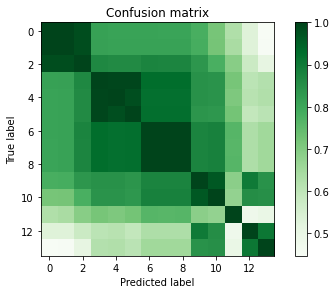

In [117]:
# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
plt.title('Confusion matrix')
plt.colorbar()
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

### References

Referred to for determination of input features to predict power output: [Forecasting Wind Power](https://lucdemortier.github.io/articles/17/WindPower).

[Selecting good features – Part IV: stability selection, RFE and everything side by side](http://blog.datadive.net/selecting-good-features-part-iv-stability-selection-rfe-and-everything-side-by-side/)